# <span style="font-variant:small-caps;"><font color=#DAA6E4 size=12>Background and Sensitivity Estimation</font></span>

This notebook should present the distributions of signal and data within control regions.

[This link](https://cms-analysis.github.io/HiggsAnalysis-CombinedLimit/part2/settinguptheanalysis/) will show you how to format the data cards and enter them into HiggsCombine.

## 1. Load signal and data events

In [1]:
from utils.fileUtils.sr import NMSSM_MX_700_MY_400

In [2]:
datTree = Tree(JetHT_Data_UL)
datTree.initialize_t6_X()

X = datTree.t6_X

In [3]:
sigTree = Tree(NMSSM_MX_700_MY_400)
sigTree.initialize_t6_X()

sig_X = sigTree.t6_X

In [234]:
sigTree.cutflow

array([17922.    , 12736.93  , 10514.24  , 10365.614 ,  9936.753 ,
        9048.4375,  7935.6445], dtype=float32)

In [236]:
sigTree.nevents

43836

In [4]:
sigTree.t6_jet_pt[sigTree.t6_jet_higgsIdx == 0]
ak.argsort(sigTree.t6_jet_pt[sigTree.t6_jet_higgsIdx == 0], axis=1)[:,0]

<Array [1, 0, 0, 1, 1, 1, ... 0, 1, 1, 1, 1, 1] type='43836 * int64'>

## 2. Define signal, control, and validation regions

Control region definitions:

<span style="font-family:Courier;">SR<sup>hs</sup> = <span style="color:green">pass</span> m<sub>H</sub> veto, <span style="color:green">pass</span> b<sub>sum</sub> veto  
SR<sup>ls</sup> = <span style="color:green">pass</span> m<sub>H</sub> veto, <span style="color:red">fail</span> b<sub>sum</sub> veto  
CR<sup>hs</sup> = <span style="color:red">fail</span> m<sub>H</sub> veto, <span style="color:green">pass</span> b<sub>sum</sub> veto  
CR<sup>ls</sup> = <span style="color:red">fail</span> m<sub>H</sub> veto, <span style="color:red">fail</span> b<sub>sum</sub> veto</span>

### <span style="font-variant:small-caps;"><font size=4>Control Region</font></span>: <font size=3>Thresholds</font>

Remember:


| | `SIGNAL REGION`   | `VALIDATION REGION`  | `CONTROL REGION`   |
| - | -------- | ----------- | ------- |
| Within | m<sub>H</sub> &#177; 30 GeV | m<sub>H</sub> &#177; 60 GeV | |
| Outside |  | m<sub>H</sub> &#177; 30 GeV | m<sub>H</sub> &#177; 60 GeV |

In [5]:
cut_6jNN = 0

# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

In [6]:
mH = 125 # GeV

SR_lo = mH - SR_edge
SR_hi = mH + SR_edge

VR_lo = mH - VR_edge
VR_hi = mH + VR_edge

CR_lo = mH - CR_edge
CR_hi = mH + CR_edge

In [7]:
# fontdict={'fontsize':16}

# fig, ax = plt.subplots(figsize=(10,10))

# ax.set_xlim(0, 250)
# ax.set_ylim(0, 250)

# ax.fill([CR_lo, CR_lo, CR_hi, CR_hi],[CR_lo, CR_hi, CR_hi, CR_lo],"peru")
# ax.text(125,125,"Signal\nRegion",va='center',ha='center', fontdict=fontdict)
# ax.fill([VR_lo, VR_lo, VR_hi, VR_hi],[VR_lo, VR_hi, VR_hi, VR_lo],"khaki")
# ax.text(125,125+(SR_edge+VR_edge)/2,"Validation\nRegion",va='center',ha='center', fontdict=fontdict)
# ax.fill([SR_lo, SR_lo, SR_hi, SR_hi],[SR_lo, SR_hi, SR_hi, SR_lo],"mediumseagreen")
# ax.text(125,125+(VR_edge+CR_edge)/2,"Control\nRegion",va='center',ha='center', fontdict=fontdict)

# ax.set_xlabel(r"$m_\mathrm{H,cand}$ [GeV]")
# ax.set_ylabel(r"$m_\mathrm{H,cand}$ [GeV]")

### <span style="font-variant:small-caps;"><font size=4>Region</font></span>: <font size=3>Masks</font>

In [7]:
### SIGNAL ###
sig_6jNN_mask = sigTree.b_6j_score > cut_6jNN # pass 6jNN mask

sig_Dm_cand = abs(sigTree.t6_higgs_m - 125)

# triple mass veto
sig_SR = ak.all(sig_Dm_cand <= SR_edge, axis=1) # SR
sig_VR = ak.all(sig_Dm_cand > SR_edge, axis=1) & ak.all(sig_Dm_cand <= VR_edge, axis=1) # VR
sig_CR = ak.all(sig_Dm_cand > VR_edge, axis=1) # CR

# # single first mass veto
# sig_SR_1 = sig_Dm_cand[:,0] <= SR_edge # SR
# sig_VR_1 = (sig_Dm_cand[:,0] > SR_edge) & (sig_Dm_cand[:,0] <= VR_edge) # VR
# sig_CR_1 = sig_Dm_cand[:,0] > VR_edge # CR

# # second first mass veto
# sig_SR_2 = sig_Dm_cand[:,1] <= SR_edge # SR
# sig_VR_2 = (sig_Dm_cand[:,1] > SR_edge) & (sig_Dm_cand[:,1] <= VR_edge) # VR
# sig_CR_2 = sig_Dm_cand[:,1] > VR_edge # CR

# # third first mass veto
# sig_SR_3 = sig_Dm_cand[:,2] <= SR_edge # SR
# sig_VR_3 = (sig_Dm_cand[:,2] > SR_edge) & (sig_Dm_cand[:,2] <= VR_edge) # VR
# sig_CR_3 = sig_Dm_cand[:,2] > VR_edge # CR

In [8]:
print("Triple mass veto")
print("SR:",int(ak.sum(sig_SR)*sigTree.scale))
print("VR:",int(ak.sum(sig_VR)*sigTree.scale))
print("CR:",int(ak.sum(sig_CR)*sigTree.scale))

# print()
# print("First mass veto")
# print("SR:",int(ak.sum(sig_SR_1)*sigTree.scale))
# print("VR:",int(ak.sum(sig_VR_1)*sigTree.scale))
# print("CR:",int(ak.sum(sig_CR_1)*sigTree.scale))

# print()
# print("Second mass veto")
# print("SR:",int(ak.sum(sig_SR_2)*sigTree.scale))
# print("VR:",int(ak.sum(sig_VR_2)*sigTree.scale))
# print("CR:",int(ak.sum(sig_CR_2)*sigTree.scale))

# print()
# print("Third mass veto")
# print("SR:",int(ak.sum(sig_SR_3)*sigTree.scale))
# print("VR:",int(ak.sum(sig_VR_3)*sigTree.scale))
# print("CR:",int(ak.sum(sig_CR_3)*sigTree.scale))

Triple mass veto
SR: 2361
VR: 363
CR: 799


In [9]:
dat_6sums = ak.sum(datTree.t6_jet_btag, axis=1)/6

In [10]:
#### DATA ####
dat_6jNN_mask = datTree.b_6j_score > cut_6jNN # pass 6jNN mask

# dat_m_cand = datTree.t6_higgs_m[:,2]
dat_Dm_cand = abs(datTree.t6_higgs_m - 125)
dat_Dm      = datTree.t6_higgs_m - 125
dat_Dm_pos  = ak.all(datTree.t6_higgs_m - 125 > 0, axis=1)
dat_Dm_neg  = ak.all(datTree.t6_higgs_m - 125 < 0, axis=1)

# triple mass veto
dat_SR = ak.all(dat_Dm_cand <= SR_edge, axis=1) # SR
dat_VR = ak.all(dat_Dm_cand > SR_edge, axis=1) & ak.all(dat_Dm_cand <= VR_edge, axis=1) # VR
dat_CR = ak.all(dat_Dm_cand > VR_edge, axis=1) # CR

hi_m = ak.all(dat_Dm < -SR_edge, axis=1)
lo_m = ak.all(dat_Dm > -VR_edge, axis=1)
dat_SRlo = ak.all(dat_Dm >= -SR_edge, axis=1) # SR
# dat_VRlo = ak.all(dat_Dm[dat_Dm_neg] < -SR_edge, axis=1) & ak.all(dat_Dm[dat_Dm_neg] >= -VR_edge, axis=1) # VR
dat_VRlo = hi_m & lo_m # VR
dat_CRlo = ak.all(dat_Dm < -VR_edge, axis=1) # CR

hi_m = ak.all(dat_Dm <= VR_edge, axis=1)
lo_m = ak.all(dat_Dm > SR_edge, axis=1)
dat_SRhi = ak.all(dat_Dm <= SR_edge, axis=1) # SR
dat_VRhi = hi_m & lo_m # VR
dat_CRhi = ak.all(dat_Dm > VR_edge, axis=1) # CR

# # single first mass veto
# dat_SR_1 = dat_Dm_cand[:,0] <= SR_edge # SR
# dat_VR_1 = (dat_Dm_cand[:,0] > SR_edge) & (dat_Dm_cand[:,0] <= VR_edge) # VR
# dat_CR_1 = dat_Dm_cand[:,0] > VR_edge # CR

# # second first mass veto
# dat_SR_2 = dat_Dm_cand[:,1] <= SR_edge # SR
# dat_VR_2 = (dat_Dm_cand[:,1] > SR_edge) & (dat_Dm_cand[:,1] <= VR_edge) # VR
# dat_CR_2 = dat_Dm_cand[:,1] > VR_edge # CR

# # third first mass veto
# dat_SR_3 = dat_Dm_cand[:,2] <= SR_edge # SR
# dat_VR_3 = (dat_Dm_cand[:,2] > SR_edge) & (dat_Dm_cand[:,2] <= VR_edge) # VR
# dat_CR_3 = dat_Dm_cand[:,2] > VR_edge # CR

In [11]:
print(ak.sum(dat_VRlo))
print(ak.sum(dat_VRhi))

14520
8784


In [12]:
print("Triple mass veto")
print("SR:",ak.sum(dat_SR))
print("VR:",ak.sum(dat_VR))
print("CR:",ak.sum(dat_CR))

# print()
# print("First mass veto")
# print("SR:",ak.sum(dat_SR_1))
# print("VR:",ak.sum(dat_VR_1))
# print("CR:",ak.sum(dat_CR_1))

# print()
# print("Second mass veto")
# print("SR:",ak.sum(dat_SR_2))
# print("VR:",ak.sum(dat_VR_2))
# print("CR:",ak.sum(dat_CR_2))

# print()
# print("Third mass veto")
# print("SR:",ak.sum(dat_SR_3))
# print("VR:",ak.sum(dat_VR_3))
# print("CR:",ak.sum(dat_CR_3))

Triple mass veto
SR: 35659
VR: 29087
CR: 70259


In [13]:
dat_CR_lo = dat_Dm_neg & dat_CRlo
dat_CR_hi = dat_Dm_pos & dat_CRhi

dat_VR_lo = dat_Dm_neg & dat_VRlo
dat_VR_hi = dat_Dm_pos & dat_VRhi

In [14]:
print(ak.sum(dat_CR_lo))
print(ak.sum(dat_CR_hi))

print(ak.sum(dat_VR_lo))
print(ak.sum(dat_VR_hi))

4224
65338
14520
8784


In [15]:
nbins = 60
mBins = np.linspace(0,2000,nbins)

findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.
findfont: Font family ['TeX Gyre Heros'] not found. Falling back to DejaVu Sans.


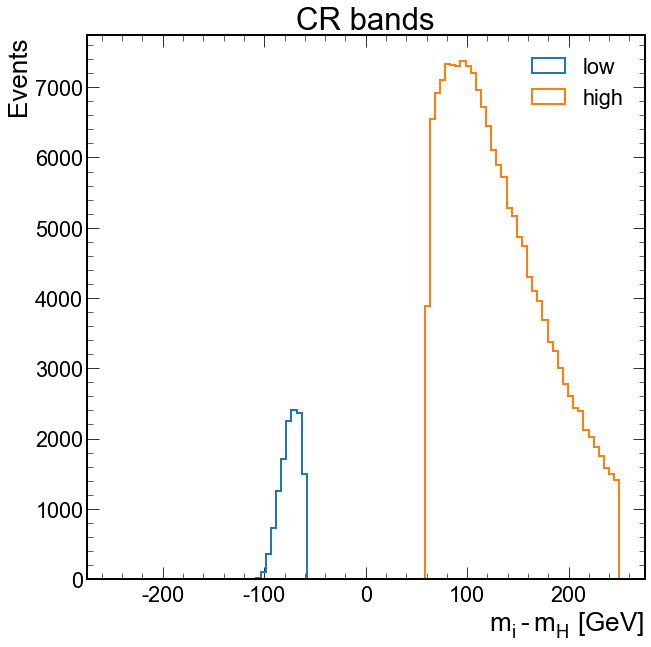

In [16]:
fig, ax = plt.subplots()

ax.set_title('CR bands')

n,e = Hist(dat_Dm[dat_CR_lo], bins=np.linspace(-250,250,100), ax=ax, label='low')
n,e = Hist(dat_Dm[dat_CR_hi], bins=np.linspace(-250,250,100), ax=ax, label='high')

ax.set_xlabel(r'$m_i - m_H$ [GeV]')
ax.set_ylabel('Events')

fig.savefig('CR_bands.pdf', bbox_inches='tight')

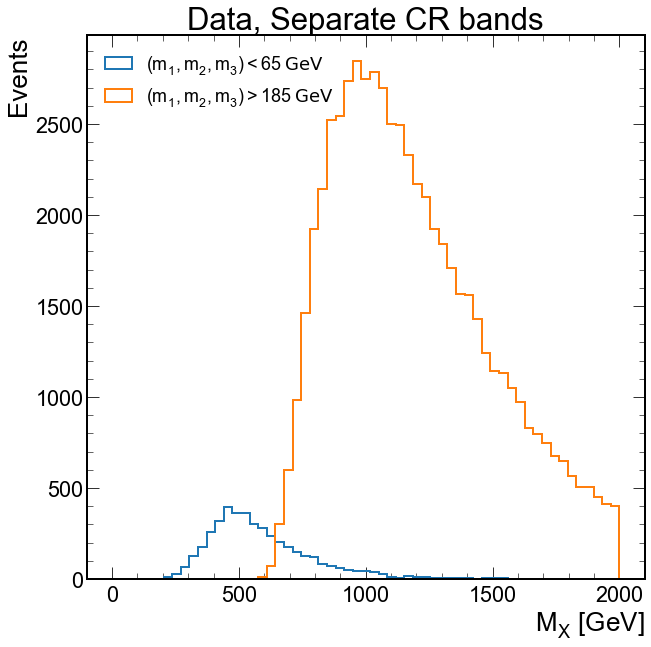

In [17]:
fig, ax = plt.subplots()

ax.set_title('Data, Separate CR bands')

n,e = Hist(X.m[dat_CR_lo], bins=mBins, ax=ax, label='$(m_1, m_2, m_3) < 65 \;\mathrm{GeV}$')
n,e = Hist(X.m[dat_CR_hi], bins=mBins, ax=ax, label='$(m_1, m_2, m_3) > 185 \;\mathrm{GeV}$')
# n,e = Hist(X.m[dat_CR], bins=mBins, ax=ax, label='$(m_1, m_2, m_3) > 185 \;\mathrm{GeV}$')

ax.legend(loc=2, fontsize=18)

ax.set_ylabel('Events')
ax.set_xlabel(r'$M_X$ [GeV]')

fig.savefig('plots/MX700_MY400/dat_CR_bands.pdf', bbox_inches='tight')

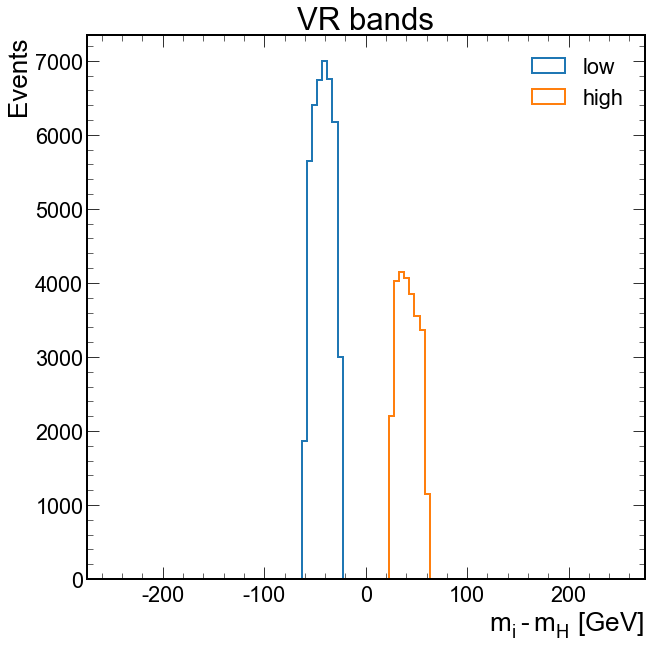

In [18]:
fig, ax = plt.subplots()

ax.set_title('VR bands')

n,e = Hist(dat_Dm[dat_VR_lo], bins=np.linspace(-250,250,100), ax=ax, label='low')
n,e = Hist(dat_Dm[dat_VR_hi], bins=np.linspace(-250,250,100), ax=ax, label='high')

ax.set_xlabel(r'$m_i - m_H$ [GeV]')
ax.set_ylabel('Events')

fig.savefig('VR_bands.pdf', bbox_inches='tight')

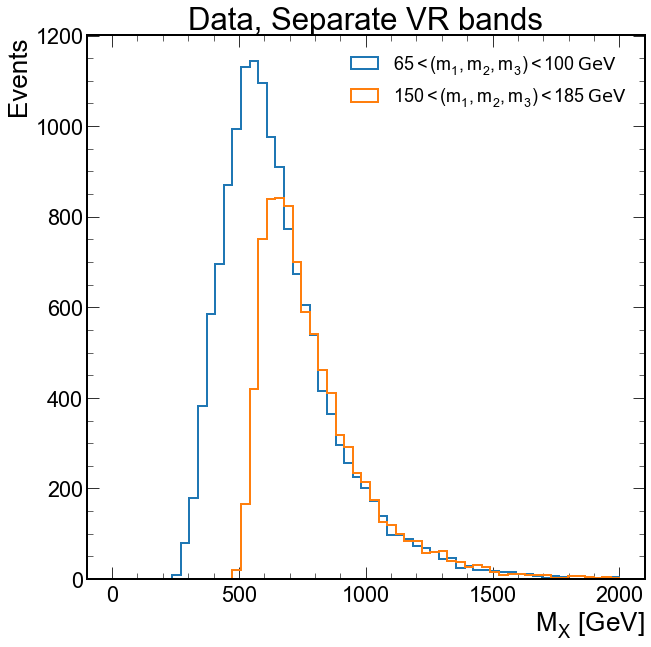

In [19]:
fig, ax = plt.subplots()

ax.set_title('Data, Separate VR bands')

n,e = Hist(X.m[dat_VR_lo], bins=mBins, ax=ax, label='$65 < (m_1, m_2, m_3) < 100 \;\mathrm{GeV}$')
n,e = Hist(X.m[dat_VR_hi], bins=mBins, ax=ax, label='$150 < (m_1, m_2, m_3) < 185 \;\mathrm{GeV}$')
# n,e = Hist(X.m[dat_VR_hi], bins=mBins, ax=ax, label='$150 < (m_1, m_2, m_3) < 185 \;\mathrm{GeV}$', bottom=n)
# n,e = Hist(X.m[dat_VR], bins=mBins, ax=ax, label='$150 < (m_1, m_2, m_3) < 185 \;\mathrm{GeV}$')

ax.set_ylabel('Events')
ax.set_xlabel(r'$M_X$ [GeV]')

ax.legend(fontsize=18)

fig.savefig('plots/MX700_MY400/dat_VR_bands.pdf', bbox_inches='tight')

In [20]:
print(ak.sum(dat_SR))
print(ak.sum(dat_VR))
print(ak.sum(dat_CR))

35659
29087
70259


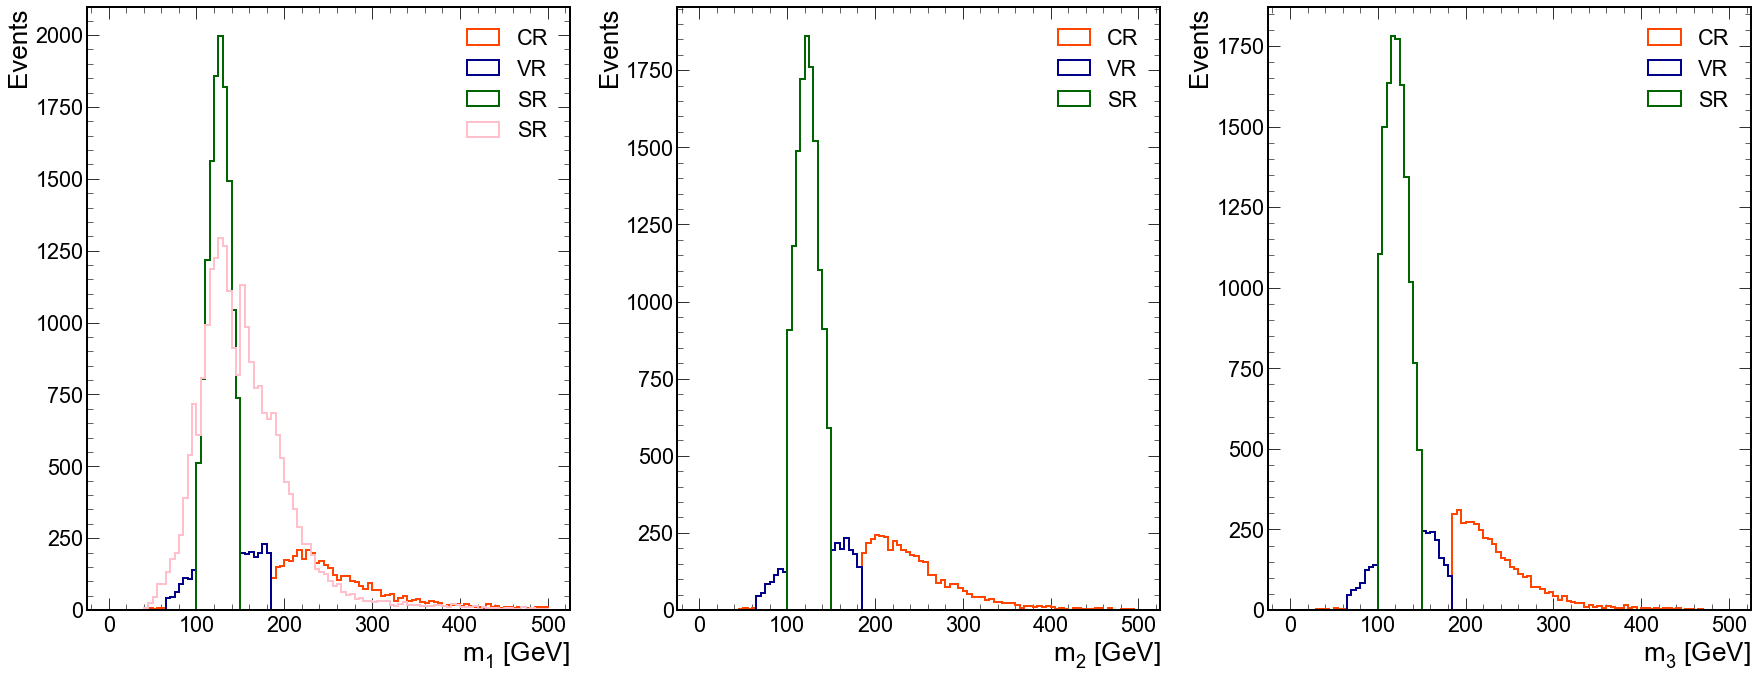

In [24]:
mH_bins = np.linspace(0,500,101)
fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=3)

ax = axs[0]
n_CR, b = Hist(sigTree.t6_higgs_m[:,0][sig_CR], bins=mH_bins, ax=ax, color='orangered', label='CR')
n_VR, b = Hist(sigTree.t6_higgs_m[:,0][sig_VR], bins=mH_bins, ax=ax, color='darkblue', label='VR')
n_VR, b = Hist(sigTree.t6_higgs_m[:,0][sig_SR], bins=mH_bins, ax=ax, color='darkgreen', label='SR')
n_VR, b = Hist(sigTree.t6_higgs_m[:,0][(~sig_CR) & (~sig_SR) & (~sig_VR)], bins=mH_bins, ax=ax, color='pink', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$m_1$ [GeV]')
ax.set_ylabel('Events')
# print(n_s.sum()/np.sqrt(n_b.sum()))

ax = axs[1]
n_CR, b = Hist(sigTree.t6_higgs_m[:,1][sig_CR], bins=mH_bins, ax=ax,color='orangered', label='CR')
n_VR, b = Hist(sigTree.t6_higgs_m[:,1][sig_VR], bins=mH_bins, ax=ax,color='darkblue', label='VR')
n_VR, b = Hist(sigTree.t6_higgs_m[:,1][sig_SR], bins=mH_bins, ax=ax,color='darkgreen', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$m_2$ [GeV]')
ax.set_ylabel('Events')

ax = axs[2]
n_s, b = Hist(sigTree.t6_higgs_m[:,2][sig_CR], bins=mH_bins, ax=ax, color='orangered', label='CR')
n_s, b = Hist(sigTree.t6_higgs_m[:,2][sig_VR], bins=mH_bins, ax=ax, color='darkblue', label='VR')
n_s, b = Hist(sigTree.t6_higgs_m[:,2][sig_SR], bins=mH_bins, ax=ax, color='darkgreen', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f'))
ax.set_xlabel(r'$m_3$ [GeV]')
ax.set_ylabel('Events')

plt.tight_layout()

## 3. Plot CR vars

Verify control region definition: mass veto.

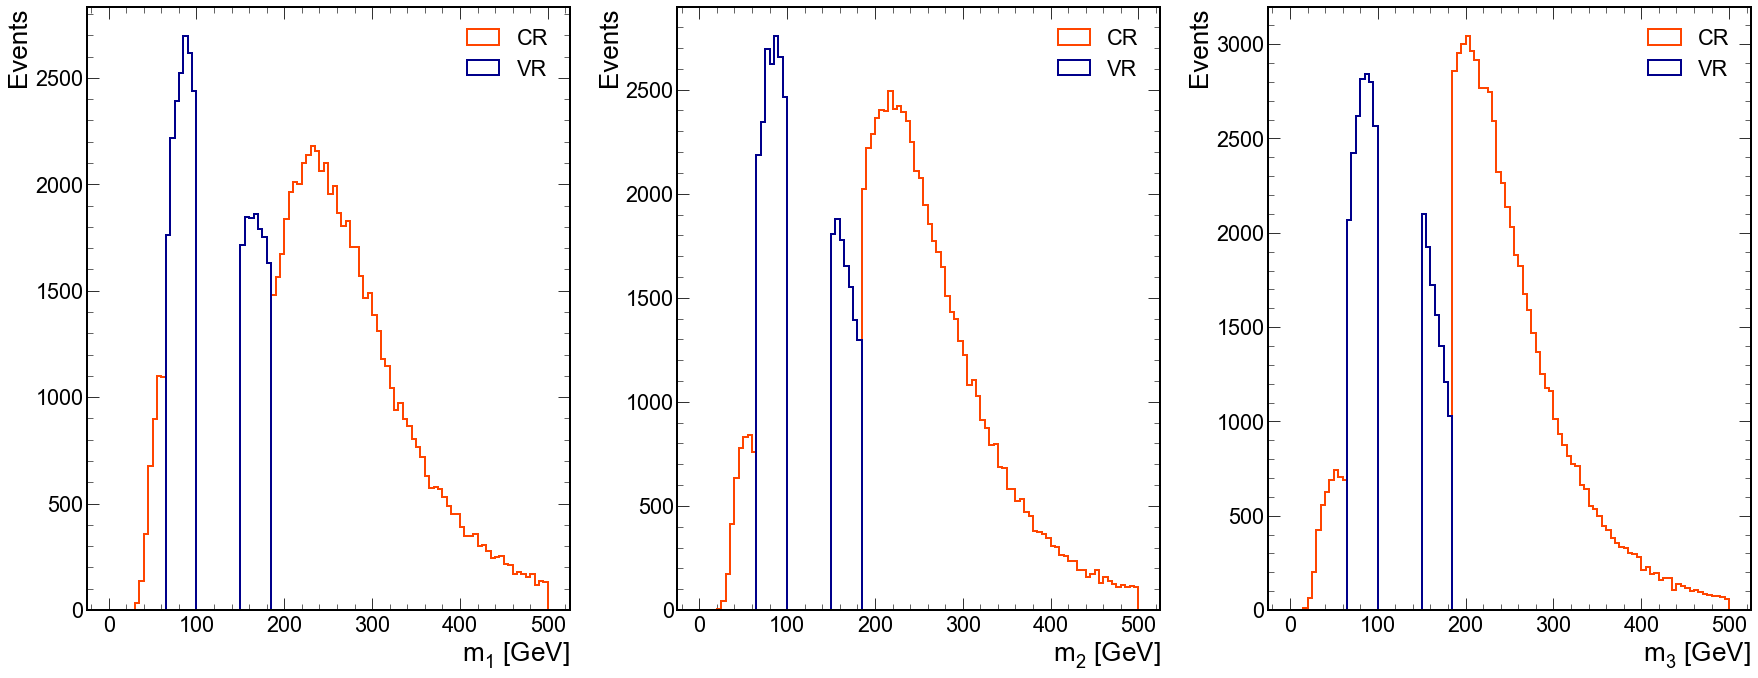

In [25]:
mH_bins = np.linspace(0,500,101)
fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=3)

ax = axs[0]
n_CR, b = Hist(datTree.t6_higgs_m[:,0][dat_CR], bins=mH_bins, ax=ax, color='orangered', label='CR')
n_VR, b = Hist(datTree.t6_higgs_m[:,0][dat_VR], bins=mH_bins, ax=ax, color='darkblue', label='VR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$m_1$ [GeV]')
# ax.set_ylabel('Fraction of Events')
ax.set_ylabel('Events')
# print(n_s.sum()/np.sqrt(n_b.sum()))

ax = axs[1]
n_CR, b = Hist(datTree.t6_higgs_m[:,1][dat_CR], bins=mH_bins, ax=ax,color='orangered', label='CR')
n_VR, b = Hist(datTree.t6_higgs_m[:,1][dat_VR], bins=mH_bins, ax=ax,color='darkblue', label='VR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$m_2$ [GeV]')
# ax.set_ylabel('Fraction of Events')
ax.set_ylabel('Events')

ax = axs[2]
n_s, b = Hist(datTree.t6_higgs_m[:,2][dat_CR], bins=mH_bins, ax=ax, color='orangered', label='CR')
n_s, b = Hist(datTree.t6_higgs_m[:,2][dat_VR], bins=mH_bins, ax=ax, color='darkblue', label='VR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f'))
ax.set_xlabel(r'$m_3$ [GeV]')
# ax.set_ylabel('Fraction of Events')
ax.set_ylabel('Events')

plt.tight_layout()

fig.savefig(f'plots/dat_mH_CRVR.pdf')

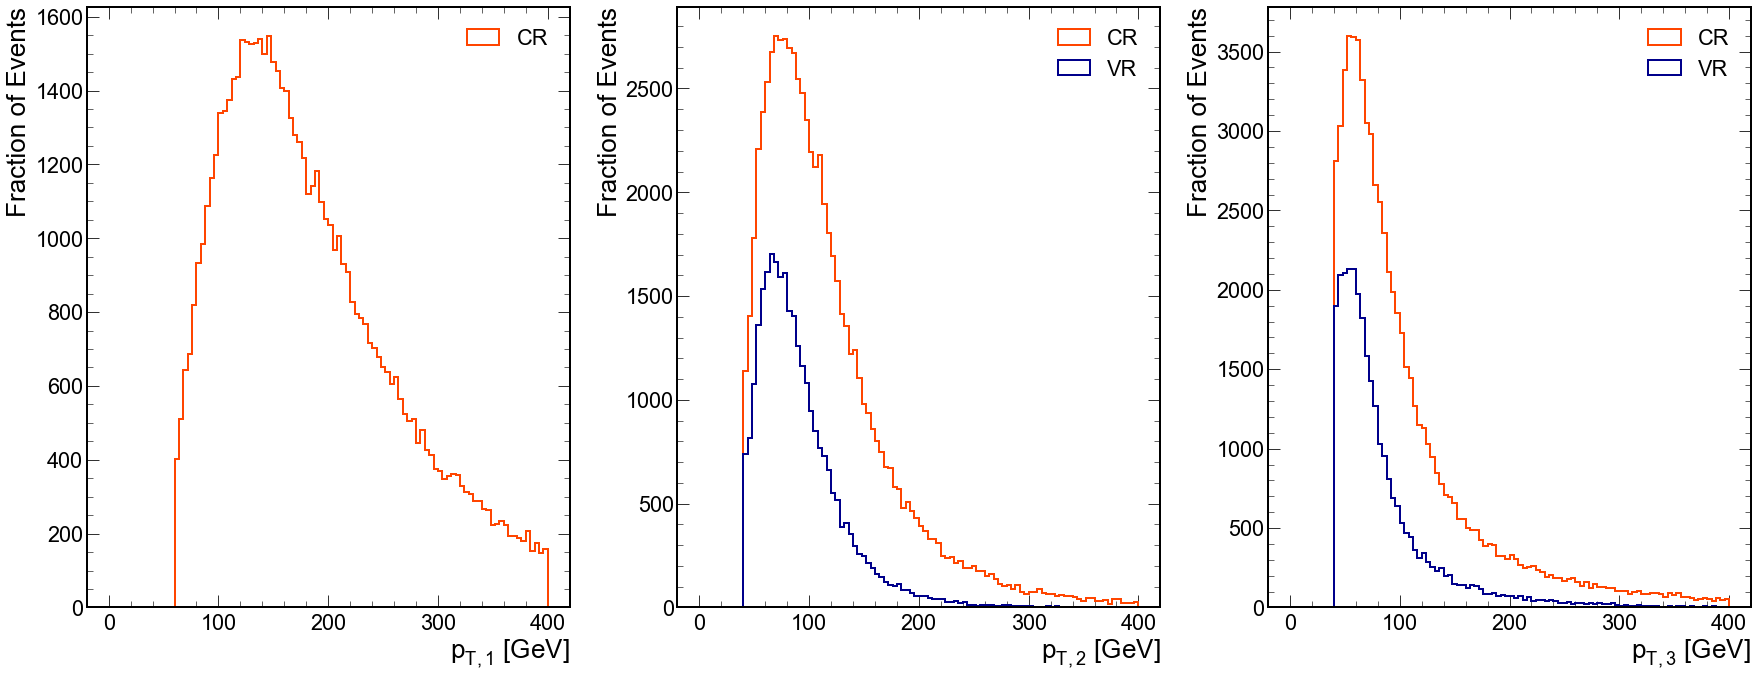

In [26]:
ptBins = np.linspace(0,400,101)
fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=3)

ax = axs[0]
n_CR, b = Hist(datTree.t6_jet_pt[:,0][dat_CR], bins=ptBins, ax=ax, color='orangered', label='CR')
# n_VR, b = Hist(datTree.t6_jet_pt[:,0][dat_VR], bins=ptBins, ax=ax, color='darkblue', label='VR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$p_{T,1}$ [GeV]')
ax.set_ylabel('Fraction of Events')
# print(n_s.sum()/np.sqrt(n_b.sum()))

ax = axs[1]
n_CR, b = Hist(datTree.t6_jet_pt[:,1][dat_CR], bins=ptBins, ax=ax,color='orangered', label='CR')
n_VR, b = Hist(datTree.t6_jet_pt[:,1][dat_VR], bins=ptBins, ax=ax,color='darkblue', label='VR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$p_{T,2}$ [GeV]')
ax.set_ylabel('Fraction of Events')

ax = axs[2]
n_s, b = Hist(datTree.t6_jet_pt[:,2][dat_CR], bins=ptBins, ax=ax, color='orangered', label='CR')
n_s, b = Hist(datTree.t6_jet_pt[:,2][dat_VR], bins=ptBins, ax=ax, color='darkblue', label='VR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f'))
ax.set_xlabel(r'$p_{T,3}$ [GeV]')
ax.set_ylabel('Fraction of Events')

plt.tight_layout()

# fig.savefig(f'plots/dat_mH_CRVR.pdf')

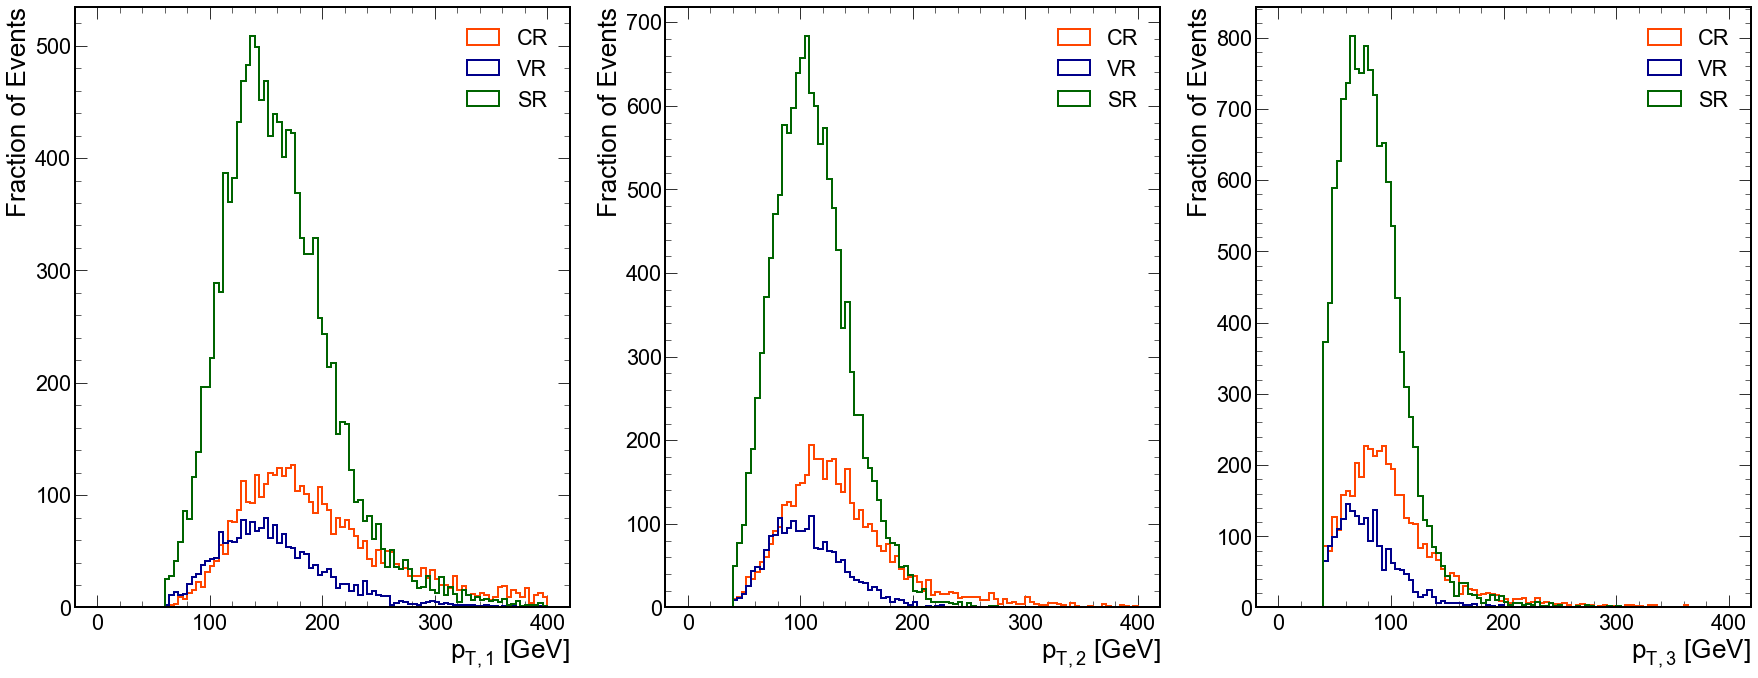

In [27]:
ptBins = np.linspace(0,400,101)
fig, axs = plt.subplots(figsize=(25,10), nrows=1, ncols=3)

ax = axs[0]
n_CR, b = Hist(sigTree.t6_jet_pt[:,0][sig_CR], bins=ptBins, ax=ax, color='orangered', label='CR')
n_VR, b = Hist(sigTree.t6_jet_pt[:,0][sig_VR], bins=ptBins, ax=ax, color='darkblue', label='VR')
n_VR, b = Hist(sigTree.t6_jet_pt[:,0][sig_SR], bins=ptBins, ax=ax, color='darkgreen', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$p_{T,1}$ [GeV]')
ax.set_ylabel('Fraction of Events')
# print(n_s.sum()/np.sqrt(n_b.sum()))

ax = axs[1]
n_CR, b = Hist(sigTree.t6_jet_pt[:,1][sig_CR], bins=ptBins, ax=ax,color='orangered', label='CR')
n_VR, b = Hist(sigTree.t6_jet_pt[:,1][sig_VR], bins=ptBins, ax=ax,color='darkblue', label='VR')
n_VR, b = Hist(sigTree.t6_jet_pt[:,1][sig_SR], bins=ptBins, ax=ax, color='darkgreen', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_xlabel(r'$p_{T,2}$ [GeV]')
ax.set_ylabel('Fraction of Events')

ax = axs[2]
n_s, b = Hist(sigTree.t6_jet_pt[:,2][sig_CR], bins=ptBins, ax=ax, color='orangered', label='CR')
n_s, b = Hist(sigTree.t6_jet_pt[:,2][sig_VR], bins=ptBins, ax=ax, color='darkblue', label='VR')
n_s, b = Hist(sigTree.t6_jet_pt[:,2][sig_SR], bins=ptBins, ax=ax, color='darkgreen', label='SR')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f'))
ax.set_xlabel(r'$p_{T,3}$ [GeV]')
ax.set_ylabel('Fraction of Events')

plt.tight_layout()

# fig.savefig(f'plots/dat_mH_CRVR.pdf')

In [28]:
# mH_bins = np.linspace(0,500,101)
# fig, axs = plt.subplots(figsize=(25,6), nrows=1, ncols=3)

# ax = axs[0]
# n_CR, b = Hist(datTree.t6_higgs_m[:,0][dat_VR], bins=mH_bins, ax=ax, color='black', density=1)
# # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.set_xlabel(r'$m_1$ [GeV]')
# ax.set_ylabel('Fraction of Events')
# # print(n_s.sum()/np.sqrt(n_b.sum()))

# ax = axs[1]
# n_s, b = Hist(datTree.t6_higgs_m[:,1][dat_VR], bins=mH_bins, ax=ax,color='black', density=1)
# # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.set_xlabel(r'$m_2$ [GeV]')
# ax.set_ylabel('Fraction of Events')

# ax = axs[2]
# n_s, b = Hist(datTree.t6_higgs_m[:,2][dat_VR], bins=mH_bins, ax=ax, color='black', density=1)
# # ax.yaxis.set_major_formatter(FormatStrFormatter('%2.2f'))
# ax.set_xlabel(r'$m_3$ [GeV]')
# ax.set_ylabel('Fraction of Events')

# plt.tight_layout()

# fig.savefig(f'plots/dat_mH_VR.pdf')

## Variable exploration

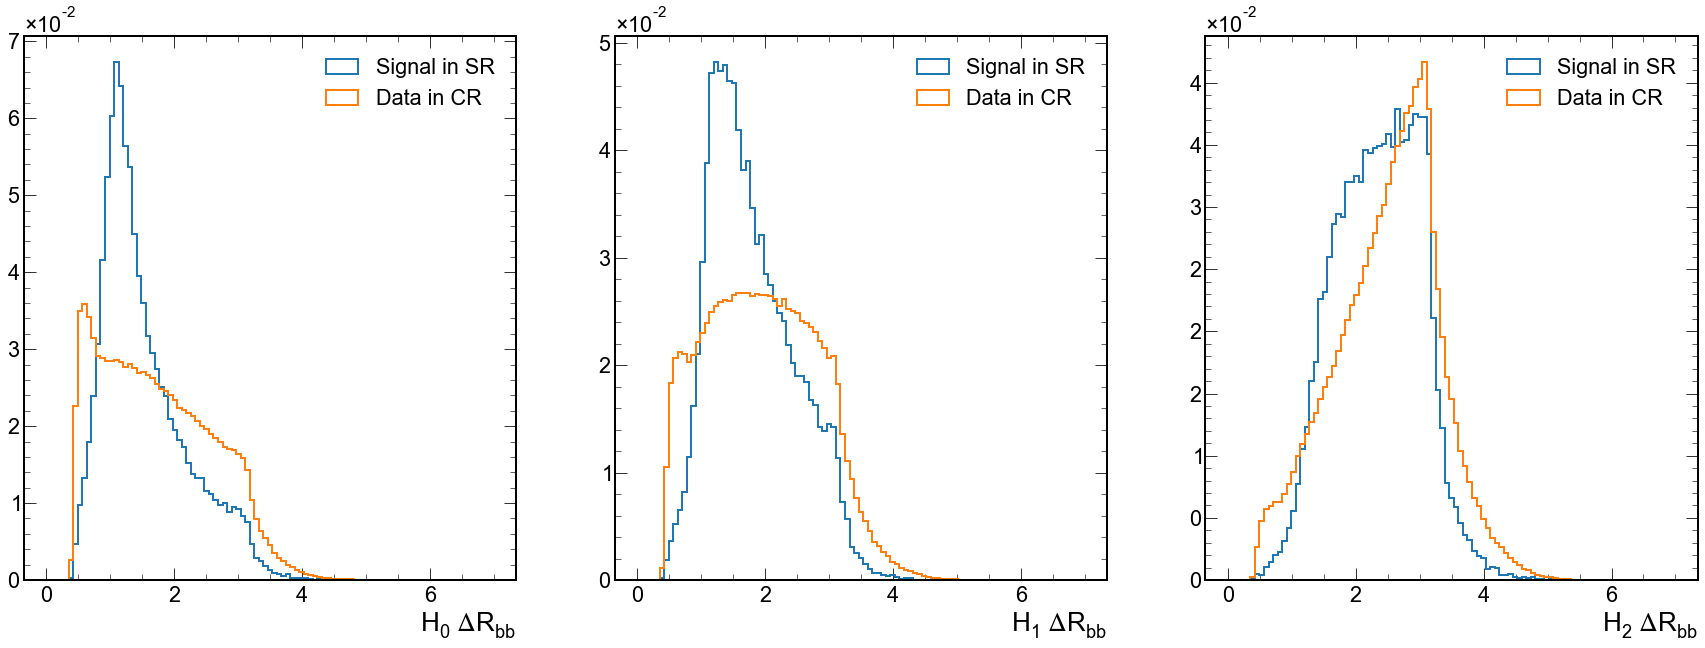

In [119]:
bins = np.linspace(0,7,100)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10))

ax = axs[0]
n,e = Hist(sigTree.t6_higgs_dr[:,0], bins=bins, ax=ax, density=1, label='Signal in SR')
n,e = Hist(datTree.t6_higgs_dr[:,0], bins=bins, ax=ax, density=1, label='Data in CR')

ax = axs[1]
n,e = Hist(sigTree.t6_higgs_dr[:,1], bins=bins, ax=ax, density=1, label='Signal in SR')
n,e = Hist(datTree.t6_higgs_dr[:,1], bins=bins, ax=ax, density=1, label='Data in CR')

ax = axs[2]
n,e = Hist(sigTree.t6_higgs_dr[:,2], bins=bins, ax=ax, density=1, label='Signal in SR')
n,e = Hist(datTree.t6_higgs_dr[:,2], bins=bins, ax=ax, density=1, label='Data in CR')

for i,ax in enumerate(axs):
    ax.set_xlabel(f'$H_{i} \; \Delta R_{{bb}}$')

In [ ]:
bins = np.linspace(0,7,100)

fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(60,10))

ax = axs[0]
n,e = Hist(sigTree.t6_jet_pt[:,0], bins=bins, ax=ax, density=1, label='Signal in SR')
n,e = Hist(datTree.t6_higgs_dr[:,0], bins=bins, ax=ax, density=1, label='Data in CR')

ax = axs[1]
n,e = Hist(sigTree.t6_higgs_dr[:,1], bins=bins, ax=ax, density=1, label='Signal in SR')
n,e = Hist(datTree.t6_higgs_dr[:,1], bins=bins, ax=ax, density=1, label='Data in CR')

ax = axs[2]
n,e = Hist(sigTree.t6_higgs_dr[:,2], bins=bins, ax=ax, density=1, label='Signal in SR')
n,e = Hist(datTree.t6_higgs_dr[:,2], bins=bins, ax=ax, density=1, label='Data in CR')

for i,ax in enumerate(axs):
    ax.set_xlabel(f'$H_{i} \; \Delta R_{{bb}}$')

In [122]:
sigTree.t6_jet_pt[sigTree.t6_jet_higgsIdx == 1]

<Array [[138, 58.5], [93.8, ... [78.1, 101]] type='43836 * var * float32'>

## Average b-tag score

Investigate control region definition: sum of b-tag score.

In [24]:
sig_4sums = ak.sum(sigTree.t6_jet_btag[:,:4], axis=1)[sig_SR]/4
dat_4sums = ak.sum(datTree.t6_jet_btag[:,:4], axis=1)[dat_CR]/4

n4_sig, edges = np.histogram(sig_4sums.to_numpy(), bins=score_bins)
n4_dat, edges = np.histogram(dat_4sums.to_numpy(), bins=score_bins)

In [32]:
n4_sig

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1,    0,    3,    8,    6,    6,   11,   21,   23,
         34,   32,   55,   56,   64,   66,   65,   75,   83,   95,  117,
        118,  154,  136,  179,  217,  237,  254,  245,  302,  305,  320,
        357,  415,  463,  522,  751,  797,  852,  854,  890, 1010, 1254,
       1590])

In [25]:
sum4_eff = []
sum4_rej = []

for cut in edges[:-1]:
    sum4_eff.append(n4_sig[edges[:-1] >= cut].sum()/n4_sig.sum())
    sum4_rej.append(n4_dat[edges[:-1] < cut].sum()/n4_dat.sum())

sum4_eff = np.append(1, np.asarray(sum4_eff))
sum4_rej = np.asarray(sum4_rej)

dx = sum4_eff[:-1] - sum4_eff[1:]
auc = np.sum(sum4_rej*dx)
sum4_rej = np.append(sum4_rej, 1)

In [92]:
opt4_arg = (abs(sum4_eff-auc)+abs(sum4_rej-auc)).argmin()
opt4_cut = score_bins[opt4_arg]

print(f"Optimal score cut = {opt4_cut}")

p_sig_hi = ak.sum(sig_4sums >= 0.88)/len(sig_4sums)
p_sig_lo = ak.sum(sig_4sums < 0.88)/len(sig_4sums)

p_bkg_hi = ak.sum(dat_4sums >= 0.88)/len(dat_4sums)
p_bkg_lo = ak.sum(dat_4sums < 0.88)/len(dat_4sums)

print(p_sig_hi,p_bkg_hi)
print(p_sig_lo,p_bkg_lo)

Optimal score cut = 0.89
0.7479107567277467 0.28659673493787274
0.2520892432722533 0.7134032650621273


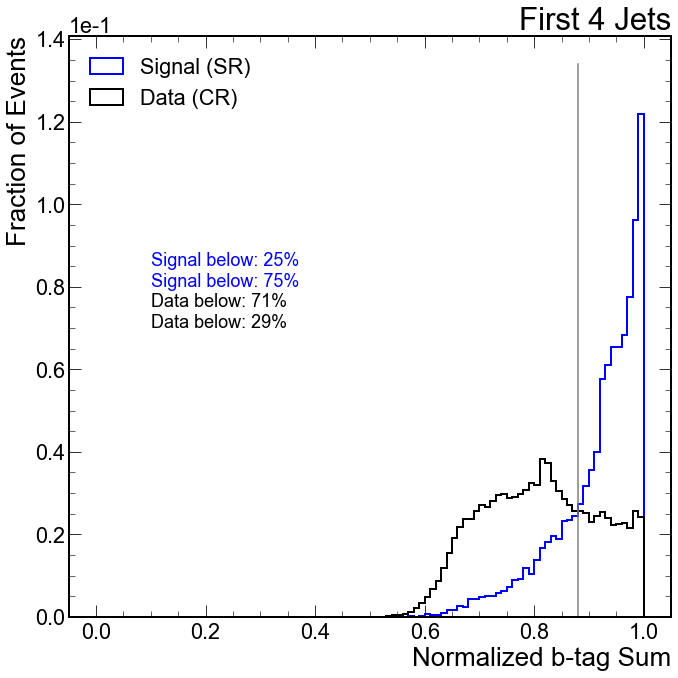

In [98]:
score_bins = np.linspace(0,1,101)

fig, ax = plt.subplots()

# fig.suptitle(sigTree.sample, x=.85, y=.95)

# ax = axs[0]
ax.set_title('First 4 Jets', loc='right')
n4_s, edges = Hist(x_bins(score_bins), weights=n4_sig/n4_sig.sum(), bins=score_bins, ax=ax, label='Signal (SR)', color='blue')
n4_data, edges = Hist(x_bins(score_bins), weights=n4_dat/n4_dat.sum(), bins=score_bins, ax=ax, label='Data (CR)', color='black')
if n4_s.max() > n4_data.max(): nMax = n4_s.max()
else: nMax = n4_data.max()
ax.plot([0.88, 0.88],[0,nMax*1.1],'gray')
ax.legend(fontsize='smaller', loc=2)
ax.set_xlabel(r'Normalized b-tag Sum')
ax.set_ylabel('Fraction of Events')

ax.text(0.1, 0.08, f'Signal below: {p_sig_lo*100:.0f}%\nSignal below: {p_sig_hi*100:.0f}%', fontsize=18, color='blue')
ax.text(0.1, 0.07, f'Data below: {p_bkg_lo*100:.0f}%\nData below: {p_bkg_hi*100:.0f}%', fontsize=18)

plt.tight_layout()

fig.savefig(f'plots/{sigTree.mXmY}_4bsum.pdf')

In [37]:
sig_2sums = ak.sum(sigTree.t6_jet_btag[:,-2:], axis=1)[sig_SR]/2
dat_2sums = ak.sum(datTree.t6_jet_btag[:,-2:], axis=1)[dat_CR]/2

n2_sig, edges = np.histogram(sig_2sums.to_numpy(), bins=score_bins)
n2_dat, edges = np.histogram(dat_2sums.to_numpy(), bins=score_bins)

In [99]:
sum2_eff = []
sum2_rej = []

for cut in edges[:-1]:
    sum2_eff.append(n2_sig[edges[:-1] >= cut].sum()/n2_sig.sum())
    sum2_rej.append(n2_dat[edges[:-1] < cut].sum()/n2_dat.sum())

sum2_eff = np.append(1, np.asarray(sum2_eff))
sum2_rej = np.asarray(sum2_rej)

dx = sum2_eff[:-1] - sum2_eff[1:]
auc = np.sum(sum2_rej*dx)
sum2_rej = np.append(sum2_rej, 1)

In [100]:
opt2_arg = (abs(sum2_eff-auc)+abs(sum2_rej-auc)).argmin()
opt2_cut = score_bins[opt2_arg]

print(f"Optimal score cut = {opt2_cut}")

p_sig_hi = ak.sum(sig_2sums >= 0.13)/len(sig_2sums)
p_sig_lo = ak.sum(sig_2sums < 0.13)/len(sig_2sums)

p_bkg_hi = ak.sum(dat_2sums >= 0.13)/len(dat_2sums)
p_bkg_lo = ak.sum(dat_2sums < 0.13)/len(dat_2sums)

print(p_sig_hi,p_bkg_hi)
print(p_sig_lo,p_bkg_lo)

Optimal score cut = 0.13
0.7669247872421989 0.16460524630296475
0.23307521275780113 0.8353947536970353


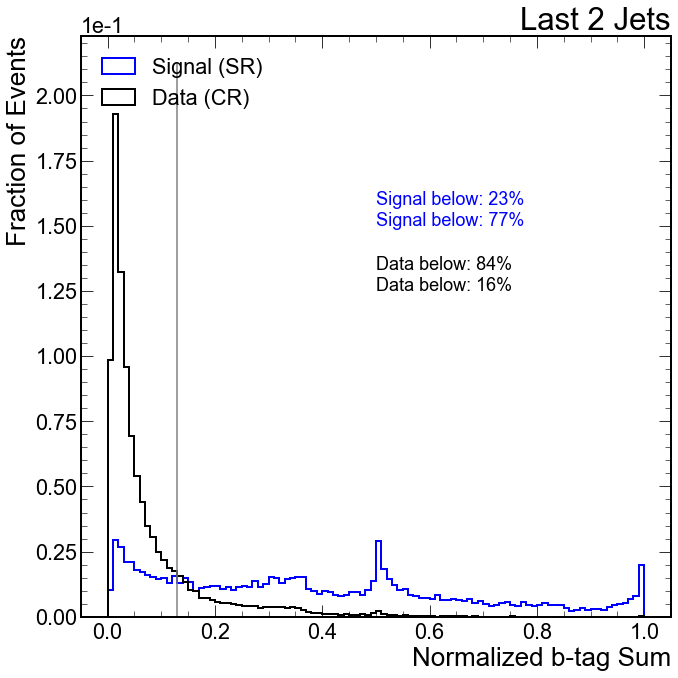

In [102]:
score_bins = np.linspace(0,1,101)

fig, ax = plt.subplots()

# fig.suptitle(sigTree.sample, x=.85, y=.95)

# ax = axs[0]
ax.set_title('Last 2 Jets', loc='right')
n2_s, edges = Hist(x_bins(score_bins), weights=n2_sig/n2_sig.sum(), bins=score_bins, ax=ax, label='Signal (SR)', color='blue')
n2_data, edges = Hist(x_bins(score_bins), weights=n2_dat/n2_dat.sum(), bins=score_bins, ax=ax, label='Data (CR)', color='black')
if n2_s.max() > n2_data.max(): nMax = n2_s.max()
else: nMax = n2_data.max()
ax.plot([0.13, 0.13],[0,nMax*1.1],'gray')
ax.legend(fontsize='smaller', loc=2)
ax.set_xlabel(r'Normalized b-tag Sum')
ax.set_ylabel('Fraction of Events')

ax.text(0.5, 0.15, f'Signal below: {p_sig_lo*100:.0f}%\nSignal below: {p_sig_hi*100:.0f}%', fontsize=18, color='blue')
ax.text(0.5, 0.125, f'Data below: {p_bkg_lo*100:.0f}%\nData below: {p_bkg_hi*100:.0f}%', fontsize=18)

plt.tight_layout()

fig.savefig(f'plots/{sigTree.mXmY}_2bsum.pdf')

In [ ]:
sig_sums = ak.sum(sigTree.t6_jet_btag, axis=1)[sig_SR]/6
dat_sums = ak.sum(datTree.t6_jet_btag, axis=1)[dat_CR]/6

n_sig, edges = np.histogram(sig_sums.to_numpy(), bins=score_bins)
n_dat, edges = np.histogram(dat_sums.to_numpy(), bins=score_bins)

In [106]:
sum6_eff = []
sum6_rej = []

for cut in edges[:-1]:
    sum6_eff.append(n_sig[edges[:-1] >= cut].sum()/n_sig.sum())
    sum6_rej.append(n_dat[edges[:-1] < cut].sum()/n_dat.sum())

sum6_eff = np.append(1, np.asarray(sum6_eff))
sum6_rej = np.asarray(sum6_rej)

dx = sum6_eff[:-1] - sum6_eff[1:]
auc = np.sum(sum6_rej*dx)
sum6_rej = np.append(sum6_rej, 1)

In [107]:
p_sig_hi = ak.sum(sig_sums >= 0.65)/len(sig_sums)
p_sig_lo = ak.sum(sig_sums < 0.65)/len(sig_sums)

p_bkg_hi = ak.sum(dat_sums >= 0.65)/len(dat_sums)
p_bkg_lo = ak.sum(dat_sums < 0.65)/len(dat_sums)

print(p_sig_hi,p_bkg_hi)
print(p_sig_lo,p_bkg_lo)

0.7511308747987426 0.155126033675401
0.24886912520125737 0.844873966324599


In [108]:
opt_arg = (abs(sum6_eff-auc)+abs(sum6_rej-auc)).argmin()
opt_cut = score_bins[opt_arg]
print(opt_cut)
# opt_cut = 0.64

print(f"Optimal score cut = {opt_cut}")

p_sig_hi = ak.sum(sig_sums >= opt_cut)/len(sig_sums)
p_sig_lo = ak.sum(sig_sums < opt_cut)/len(sig_sums)

p_bkg_hi = ak.sum(dat_sums >= opt_cut)/len(dat_sums)
p_bkg_lo = ak.sum(dat_sums < opt_cut)/len(dat_sums)

print(p_sig_hi,p_bkg_hi)
print(p_sig_lo,p_bkg_lo)

0.66
Optimal score cut = 0.66
0.7252932607528942 0.12135100129520773
0.2747067392471057 0.8786489987047923


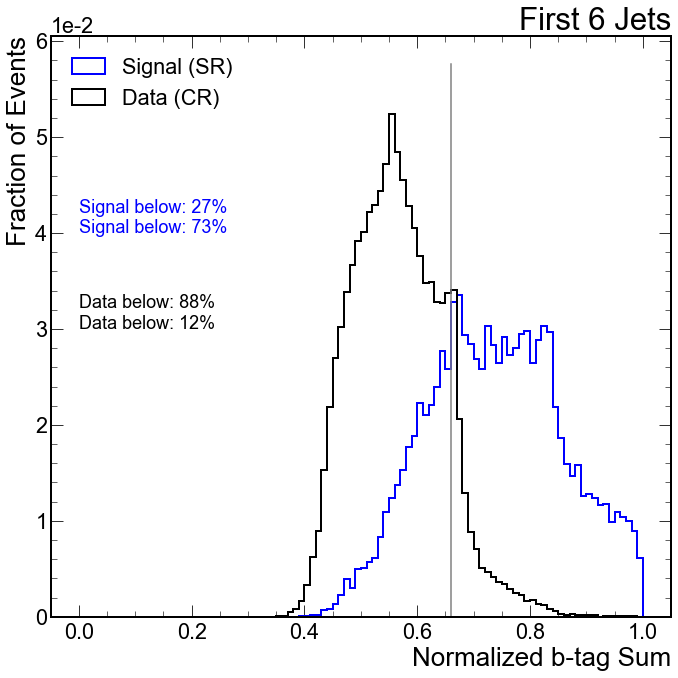

In [110]:
score_bins = np.linspace(0,1,101)

fig, ax = plt.subplots()

# fig.suptitle(sigTree.sample, x=.85, y=.95)

# ax = axs[0]
ax.set_title('First 6 Jets', loc='right')
n_s, edges = Hist(x_bins(score_bins), weights=n_sig/n_sig.sum(), bins=score_bins, ax=ax, label='Signal (SR)', color='blue')
n_data, edges = Hist(x_bins(score_bins), weights=n_dat/n_dat.sum(), bins=score_bins, ax=ax, label='Data (CR)', color='black')
if n_s.max() > n_data.max(): nMax = n_s.max()
else: nMax = n_data.max()
ax.plot([opt_cut, opt_cut],[0,nMax*1.1],'gray')
ax.legend(fontsize='smaller', loc=2)
ax.set_xlabel(r'Normalized b-tag Sum')
ax.set_ylabel('Fraction of Events')

ax.text(0.0, 0.04, f'Signal below: {p_sig_lo*100:.0f}%\nSignal below: {p_sig_hi*100:.0f}%', fontsize=18, color='blue')
ax.text(0.0, 0.03, f'Data below: {p_bkg_lo*100:.0f}%\nData below: {p_bkg_hi*100:.0f}%', fontsize=18)

plt.tight_layout()

fig.savefig(f'plots/{sigTree.mXmY}_6bsum.pdf')

In [54]:
# score_bins = np.linspace(0,1,101)

# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# # fig.suptitle(sigTree.sample, x=.85, y=.95)

# ax = axs[0]
# ax.set_title('First 6 Jets', loc='right')
# n_s, edges = Hist(x_bins(score_bins), weights=n_sig/n_sig.sum(), bins=score_bins, ax=ax, label='Signal (SR)', color='blue')
# n_data, edges = Hist(x_bins(score_bins), weights=n_data/n_data.sum(), bins=score_bins, ax=ax, label='Data (CR)', color='black')
# if n_s.max() > n_data.max(): nMax = n_s.max()
# else: nMax = n_data.max()
# ax.plot([opt_cut, opt_cut],[0,nMax*1.1],'gray')
# ax.legend(fontsize='smaller', loc=2)
# ax.set_xlabel(r'Normalized b-tag Sum')
# ax.set_ylabel('Fraction of Events')

# ax = axs[1]
# ax.set_title('First 6 Jets', loc='right')
# ax.plot(sum6_eff, sum6_rej, linewidth=2)
# ax.set_xlabel(r'Signal Efficiency')
# ax.set_ylabel('Background Rejection')
# dx = sum6_eff[:-1]-sum6_eff[1:]
# auc = np.sum(sum6_rej[:-1]*dx)
# bbox_props = dict(boxstyle="round,pad=0.3", ec="k", fc='white', lw=2)
# t = ax.text(0.2, 0.1, f"auc = {auc:.3f}", ha="center", va="center", transform=ax.transAxes,
#             # size=20,
#             bbox=bbox_props)
# ax.scatter(sum6_eff[::10], sum6_rej[::10])
# ax.scatter(sum6_eff[opt_arg], sum6_rej[opt_arg])
# print(opt_cut)

# plt.tight_layout()

# fig.savefig(f'plots/{sigTree.mXmY}_bsum_roc.pdf')

In [90]:
#### DATA ####
# score veto
dat_ls_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 < opt_cut # ls
dat_hs_mask = ak.sum(datTree.t6_jet_btag, axis=1)/6 >= opt_cut # hs

dat_CR_lo_ls = dat_ls_mask & dat_CR_lo
dat_CR_hi_ls = dat_ls_mask & dat_CR_hi
dat_CR_lo_hs = dat_hs_mask & dat_CR_lo
dat_CR_hi_hs = dat_hs_mask & dat_CR_hi

dat_VR_lo_ls = dat_ls_mask & dat_VR_lo
dat_VR_hi_ls = dat_ls_mask & dat_VR_hi
dat_VR_lo_hs = dat_hs_mask & dat_VR_lo
dat_VR_hi_hs = dat_hs_mask & dat_VR_hi

# combination
dat_CRls_mask = dat_6jNN_mask & dat_CR & dat_ls_mask
dat_CRhs_mask = dat_6jNN_mask & dat_CR & dat_hs_mask
dat_VRls_mask = dat_6jNN_mask & dat_VR & dat_ls_mask
dat_VRhs_mask = dat_6jNN_mask & dat_VR & dat_hs_mask
dat_SRls_mask = dat_6jNN_mask & dat_SR & dat_ls_mask

In [57]:
print(ak.sum(dat_CR_lo_ls))
print(ak.sum(dat_CR_hi_ls))
print(ak.sum(dat_CR_lo_hs))
print(ak.sum(dat_CR_hi_hs))

TF_lo = ak.sum(dat_CR_lo_hs)/ak.sum(dat_CR_lo_ls)
TF_hi = ak.sum(dat_CR_hi_hs)/ak.sum(dat_CR_hi_ls)

print()
print(TF_lo)
print(TF_hi)

3483
55285
741
10053

0.2127476313522825
0.18183955865062856


In [58]:
### SIGNAL ###
# score veto
sig_ls_mask = ak.sum(sigTree.t6_jet_btag, axis=1)/6 < opt_cut # ls
sig_hs_mask = ak.sum(sigTree.t6_jet_btag, axis=1)/6 >= opt_cut # hs

# combination
sig_SRhs_mask = sig_SR & sig_hs_mask
sig_SRls_mask = sig_SR & sig_ls_mask
sig_VRhs_mask = sig_VR & sig_hs_mask
sig_VRls_mask = sig_VR & sig_ls_mask
sig_CRhs_mask = sig_CR & sig_hs_mask
sig_CRls_mask = sig_CR & sig_ls_mask

In [59]:
print(int(ak.sum(sig_SRls_mask)*sigTree.scale))
print(int(ak.sum(sig_SRhs_mask)*sigTree.scale))
print(int(ak.sum(sig_VRls_mask)*sigTree.scale))
print(int(ak.sum(sig_VRhs_mask)*sigTree.scale))
print(int(ak.sum(sig_CRls_mask)*sigTree.scale))
print(int(ak.sum(sig_CRhs_mask)*sigTree.scale))

587
1773
123
240
334
464


## Transfer Factor - Normalization

In [60]:
TF = ak.sum(dat_CRhs_mask)/ak.sum(dat_CRls_mask)
TF

0.18360849056603773

In [61]:
from colorama import Fore, Style

In [62]:
print(ak.sum(dat_SRls_mask))
print(Fore.RED + str(int(ak.sum(dat_SRls_mask)*TF)) + Style.RESET_ALL)
# print(ak.sum(dat_SRhs_mask))
print(ak.sum(dat_VRls_mask))
print(ak.sum(dat_VRhs_mask))
print(ak.sum(dat_CRls_mask))
print(ak.sum(dat_CRhs_mask))

29525
5421
24186
4901
59360
10899


Transfer Factor, TF

## Use CRhs and CRls to observe variables

In [63]:
max_mass = 2000
min_mass = 250

In [56]:
# bins = np.linspace(0,300,100)

# fig, axs = plt.subplots(figsize=(30,15),nrows=2, ncols=3)

# for i,ax in enumerate(axs.flat):
#     n, e = Hist(datTree.t6_jet_pt[dat_CRls_mask][:,i], bins=bins, ax=ax, label='CR ls', density=1, color='k')
#     n, e = Hist(datTree.t6_jet_pt[dat_CRhs_mask][:,i], bins=bins, ax=ax, label='CR hs', density=1, color='slategrey')
#     ax.set_xlabel(rf'Jet {i} $p_T$ [GeV]')
#     ax.set_ylabel('Fraction of Events')

# fig.savefig(f'plots/dat_jet_pt.pdf')

In [57]:
# fig, axs = plt.subplots(figsize=(15,5), nrows=1, ncols=2)

# ax = axs[0]
# n, e = Hist(X.m[dat_CRls_mask], bins=np.linspace(0,max_mass,100), label='CR ls', ax=ax, color='k')
# n, e = Hist(X.m[dat_CRhs_mask], bins=np.linspace(0,max_mass,100), ax=ax, label='CR hs', color='slategrey')
# ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
# ax.set_ylabel('Events')

# ax = axs[1]
# n, e = Hist(X.m[dat_CRls_mask], bins=np.linspace(0,max_mass,100), label='CR ls', ax=ax, density=1, color='k')
# n, e = Hist(X.m[dat_CRhs_mask], bins=np.linspace(0,max_mass,100), ax=ax, label='CR hs', density=1, color='slategrey')
# ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
# ax.set_ylabel('Events')

# plt.tight_layout()

CRhs and CRls have similar shapes. Yay!

## Estimate sensitivity using mX

In [64]:
mX = int(sigTree.sample.split(' ')[1])
mY = int(sigTree.sample.split(' ')[4])

In [65]:
sig_X.M

<Array [721, 575, 703, 618, ... 751, 778, 589] type='43836 * float32'>

In [66]:
X.m[dat_CRls_mask]

<Array [1.33e+03, 1.06e+03, ... 3.18e+03] type='59360 * float32'>

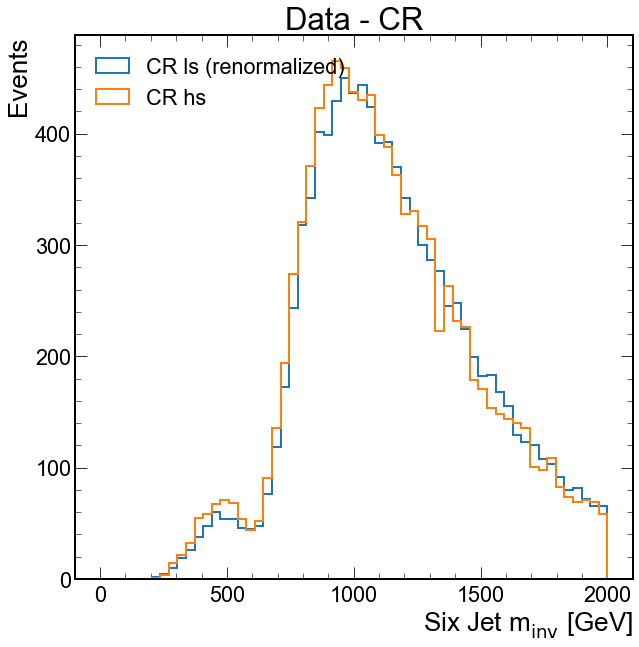

In [67]:
fig, ax = plt.subplots()#nrows=2, ncols=1, gridspec={})

ax.set_title('Data - CR')

n_CRls, e = np.histogram(X.m[dat_CRls_mask].to_numpy(), bins=mBins)
# print(n_CRls)
n_CRls_transformed, e = Hist(x_bins(e), weights=n_CRls*TF, bins=mBins, ax=ax, label='CR ls (renormalized)')
# n_CR, e = Hist(X.m[dat_CRls_mask], bins=mBins, ax=ax, label='CR ls')
# B = n[(e[:-1]>xmin) & (e[:-1]<xmax)].sum()
n_CRhs, e = Hist(X.m[dat_CRhs_mask].to_numpy(), bins=mBins, ax=ax, label='CR hs')
# print(n_CRhs.sum())

# ax.plot([xmin, xmin], [0, n.max()], color='k', alpha=0.6)
# ax.plot([xmax, xmax], [0, n.max()], color='k', alpha=0.6)

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

# fig.savefig(f'plots/{sigTree.mXmY}_data_VRls_v_VRhs.pdf')


## SPLIT INTO HIGH AND LOW INV MASS

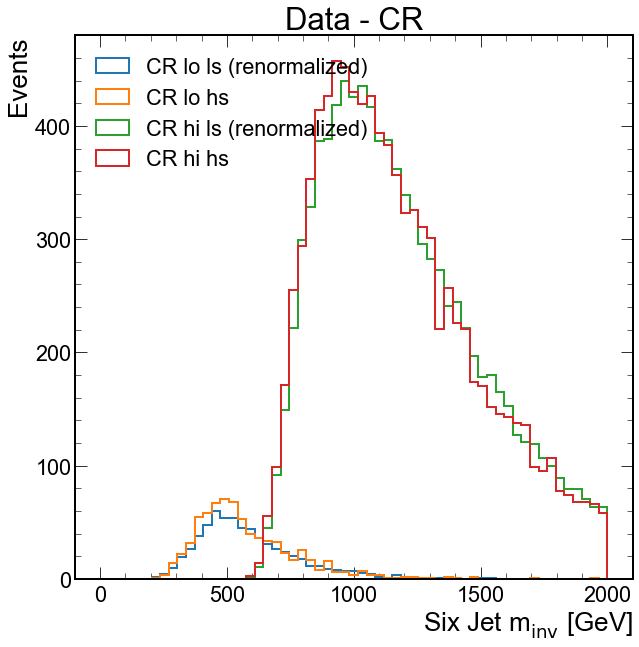

In [68]:
fig, ax = plt.subplots()#nrows=2, ncols=1, gridspec={})

ax.set_title('Data - CR')

n_CRls_lo, e = np.histogram(X.m[dat_CR_lo_ls].to_numpy(), bins=mBins)
n_CRls_lo_transformed, e = Hist(x_bins(e), weights=n_CRls_lo*TF, bins=mBins, ax=ax, label='CR lo ls (renormalized)')
n_CRhs, e = Hist(X.m[dat_CR_lo_hs].to_numpy(), bins=mBins, ax=ax, label='CR lo hs')

n_CRls_hi, e = np.histogram(X.m[dat_CR_hi_ls].to_numpy(), bins=mBins)
n_CRls_hi_transformed, e = Hist(x_bins(e), weights=n_CRls_hi*TF, bins=mBins, ax=ax, label='CR hi ls (renormalized)')
n_CRhs, e = Hist(X.m[dat_CR_hi_hs].to_numpy(), bins=mBins, ax=ax, label='CR hi hs')


ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

# fig.savefig(f'plots/{sigTree.mXmY}_data_VRls_v_VRhs.pdf')

Text(0, 1, 'Events')

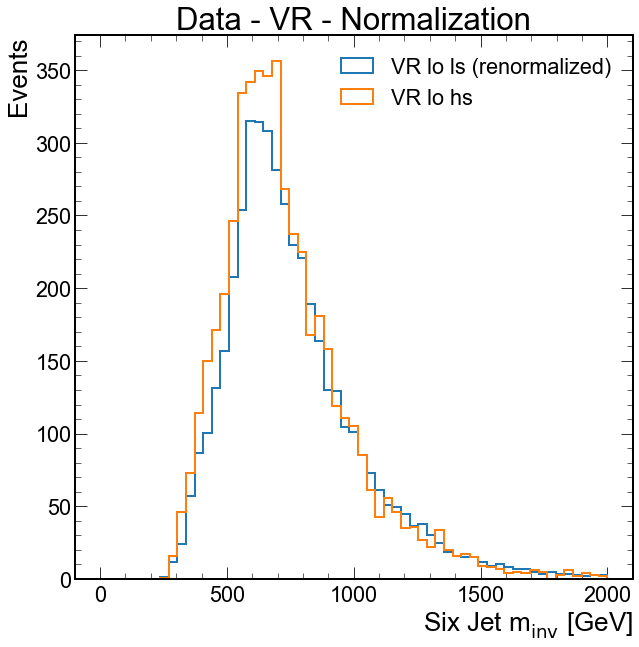

In [233]:
fig, ax = plt.subplots()#nrows=2, ncols=1, gridspec={})

ax.set_title('Data - VR - Normalization')

n_VRls, e = np.histogram(X.m[dat_VRls_mask].to_numpy(), bins=mBins)
n_VRls_transformed, e = Hist(x_bins(e), weights=n_VRls*TF, bins=mBins, ax=ax, label='VR lo ls (renormalized)')
n_VRhs, e = Hist(X.m[dat_VRhs_mask].to_numpy(), bins=mBins, ax=ax, label='VR lo hs')

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')

# fig.savefig(f'plots/{sigTree.mXmY}_data_VRls_v_VRhs.pdf')

Text(0, 1, 'Events')

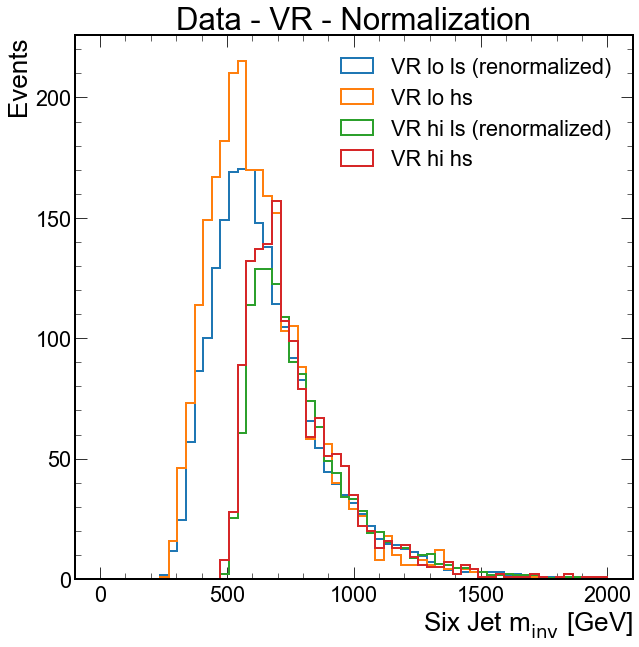

In [69]:
fig, ax = plt.subplots()#nrows=2, ncols=1, gridspec={})

ax.set_title('Data - VR - Normalization')

n_VRls_lo, e = np.histogram(X.m[dat_VR_lo_ls].to_numpy(), bins=mBins)
n_VRls_lo_transformed, e = Hist(x_bins(e), weights=n_VRls_lo*TF, bins=mBins, ax=ax, label='VR lo ls (renormalized)')
n_VRhs_lo, e = Hist(X.m[dat_VR_lo_hs].to_numpy(), bins=mBins, ax=ax, label='VR lo hs')

n_VRls_hi, e = np.histogram(X.m[dat_VR_hi_ls].to_numpy(), bins=mBins)
n_VRls_hi_transformed, e = Hist(x_bins(e), weights=n_VRls_hi*TF, bins=mBins, ax=ax, label='VR hi ls (renormalized)')
n_VRhs_hi, e = Hist(X.m[dat_VR_hi_hs].to_numpy(), bins=mBins, ax=ax, label='VR hi hs')

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')

# fig.savefig(f'plots/{sigTree.mXmY}_data_VRls_v_VRhs.pdf')

## BDT-Reweighting

In [70]:
from hep_ml import reweight
from pandas import DataFrame

In [125]:
datTree.t6_higgs_pt

<Array [[157, 147, 133], ... 84.8, 82.1, 80.6]] type='434815 * var * float32'>

In [212]:
dat_crls_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][dat_CRls_mask].to_numpy()
dat_crls_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][dat_CRls_mask].to_numpy()
dat_crls_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][dat_CRls_mask].to_numpy()
dat_crls_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][dat_CRls_mask].to_numpy()
dat_crls_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][dat_CRls_mask].to_numpy()
dat_crls_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][dat_CRls_mask].to_numpy()
dat_crls_H1_pt = datTree.t6_higgs_pt[:,0][dat_CRls_mask].to_numpy()
dat_crls_H2_pt = datTree.t6_higgs_pt[:,1][dat_CRls_mask].to_numpy()
dat_crls_H3_pt = datTree.t6_higgs_pt[:,2][dat_CRls_mask].to_numpy()
dat_crls_H1_eta = datTree.t6_higgs_eta[:,0][dat_CRls_mask].to_numpy()
dat_crls_H2_eta = datTree.t6_higgs_eta[:,1][dat_CRls_mask].to_numpy()
dat_crls_H3_eta = datTree.t6_higgs_eta[:,2][dat_CRls_mask].to_numpy()
dat_crls_H1_dr = datTree.t6_higgs_dr[:,0][dat_CRls_mask].to_numpy()
dat_crls_H2_dr = datTree.t6_higgs_dr[:,1][dat_CRls_mask].to_numpy()
dat_crls_H3_dr = datTree.t6_higgs_dr[:,2][dat_CRls_mask].to_numpy()

dat_crhs_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H1_pt = datTree.t6_higgs_pt[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H2_pt = datTree.t6_higgs_pt[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H3_pt = datTree.t6_higgs_pt[:,2][dat_CRhs_mask].to_numpy()
dat_crhs_H1_eta = datTree.t6_higgs_eta[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H2_eta = datTree.t6_higgs_eta[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H3_eta = datTree.t6_higgs_eta[:,2][dat_CRhs_mask].to_numpy()
dat_crhs_H1_dr = datTree.t6_higgs_dr[:,0][dat_CRhs_mask].to_numpy()
dat_crhs_H2_dr = datTree.t6_higgs_dr[:,1][dat_CRhs_mask].to_numpy()
dat_crhs_H3_dr = datTree.t6_higgs_dr[:,2][dat_CRhs_mask].to_numpy()

dat_vrls_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H1_pt = datTree.t6_higgs_pt[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H2_pt = datTree.t6_higgs_pt[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H3_pt = datTree.t6_higgs_pt[:,2][dat_VRls_mask].to_numpy()
dat_vrls_H1_eta = datTree.t6_higgs_eta[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H2_eta = datTree.t6_higgs_eta[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H3_eta = datTree.t6_higgs_eta[:,2][dat_VRls_mask].to_numpy()
dat_vrls_H1_dr = datTree.t6_higgs_dr[:,0][dat_VRls_mask].to_numpy()
dat_vrls_H2_dr = datTree.t6_higgs_dr[:,1][dat_VRls_mask].to_numpy()
dat_vrls_H3_dr = datTree.t6_higgs_dr[:,2][dat_VRls_mask].to_numpy()

dat_vrhs_H1_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H1_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 0], axis=1, ascending=False)[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 1], axis=1, ascending=False)[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_b1_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_b2_pt = ak.sort(datTree.t6_jet_pt[datTree.t6_jet_higgsIdx == 2], axis=1, ascending=False)[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H1_pt = datTree.t6_higgs_pt[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_pt = datTree.t6_higgs_pt[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_pt = datTree.t6_higgs_pt[:,2][dat_VRhs_mask].to_numpy()
dat_vrhs_H1_eta = datTree.t6_higgs_eta[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_eta = datTree.t6_higgs_eta[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_eta = datTree.t6_higgs_eta[:,2][dat_VRhs_mask].to_numpy()
dat_vrhs_H1_dr = datTree.t6_higgs_dr[:,0][dat_VRhs_mask].to_numpy()
dat_vrhs_H2_dr = datTree.t6_higgs_dr[:,1][dat_VRhs_mask].to_numpy()
dat_vrhs_H3_dr = datTree.t6_higgs_dr[:,2][dat_VRhs_mask].to_numpy()

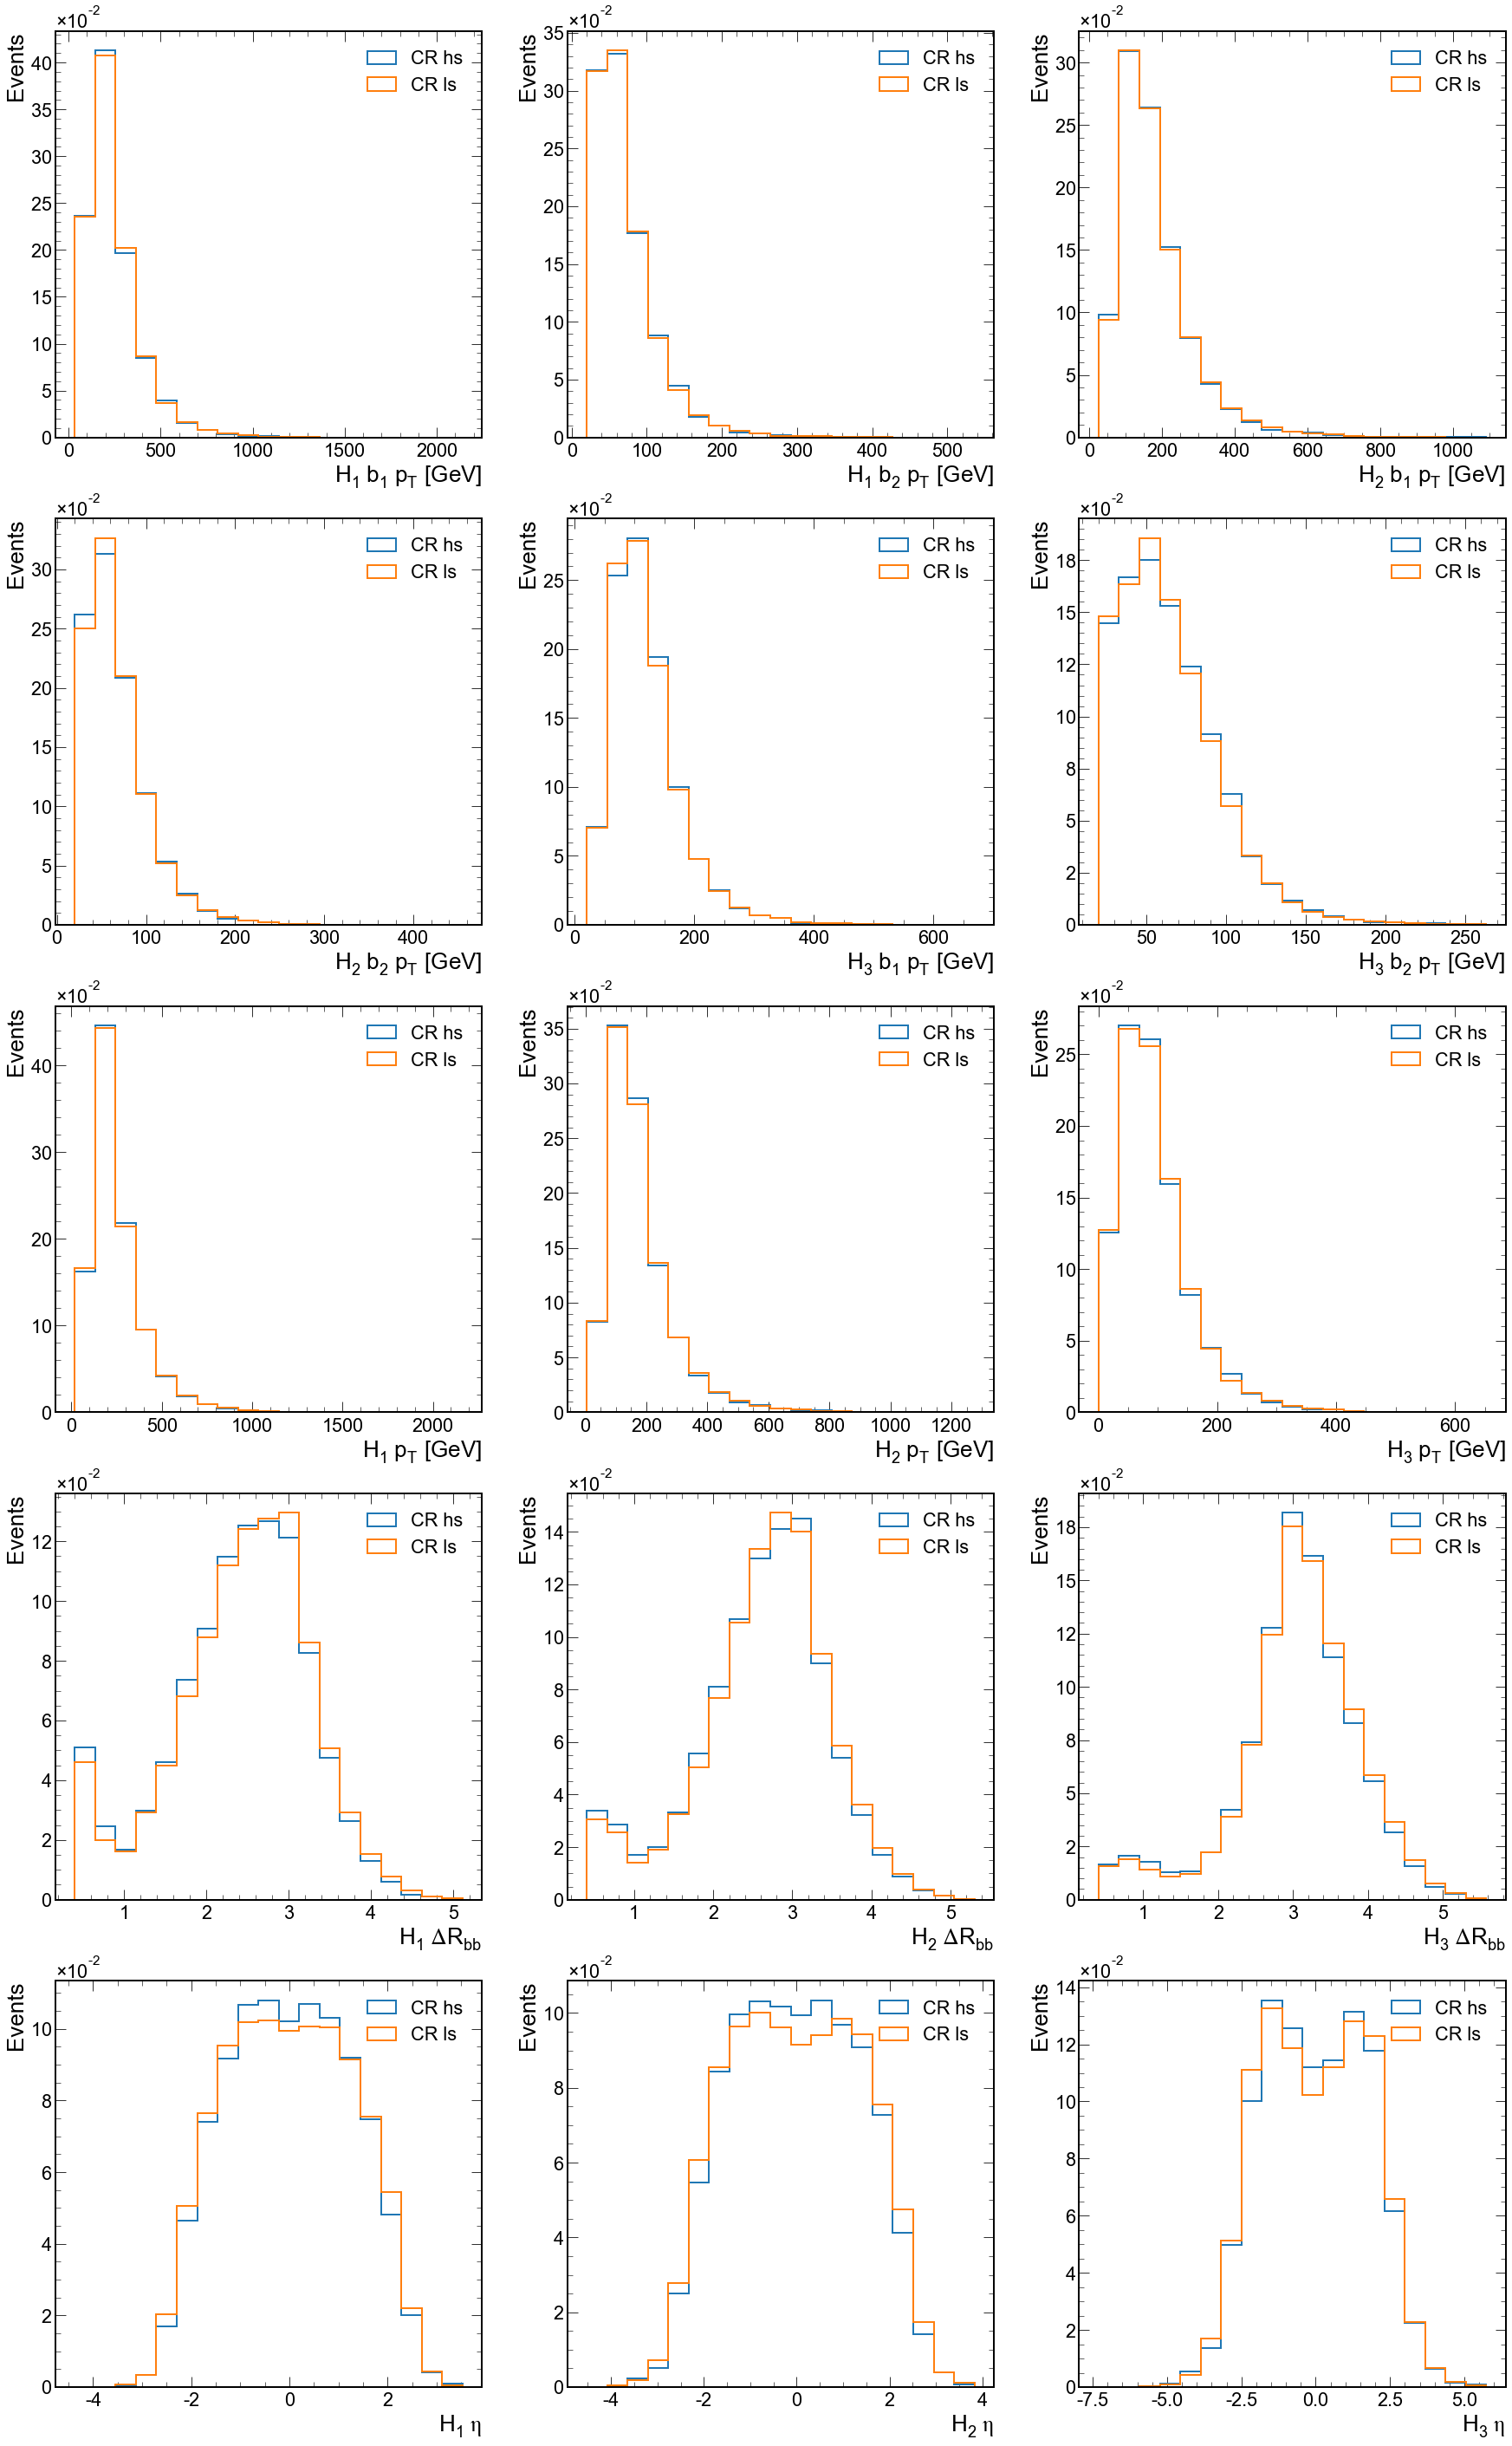

In [210]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(30,50))

crls_vars = [dat_crls_H1_b1_pt, dat_crls_H1_b2_pt, dat_crls_H2_b1_pt, dat_crls_H2_b2_pt, dat_crls_H3_b1_pt, dat_crls_H3_b2_pt, dat_crls_H1_pt, dat_crls_H2_pt, dat_crls_H3_pt,dat_crls_H1_dr, dat_crls_H2_dr, dat_crls_H3_dr,dat_crls_H1_eta, dat_crls_H2_eta, dat_crls_H3_eta]
crhs_vars = [dat_crhs_H1_b1_pt, dat_crhs_H1_b2_pt, dat_crhs_H2_b1_pt, dat_crhs_H2_b2_pt, dat_crhs_H3_b1_pt, dat_crhs_H3_b2_pt, dat_crhs_H1_pt, dat_crhs_H2_pt, dat_crhs_H3_pt,dat_crhs_H1_dr, dat_crhs_H2_dr, dat_crhs_H3_dr,dat_crhs_H1_eta, dat_crhs_H2_eta, dat_crhs_H3_eta]
labels = [r'$H_1 \;b_1\; p_T$ [GeV]',
          r'$H_1 \;b_2\; p_T$ [GeV]',
          r'$H_2 \;b_1\; p_T$ [GeV]',
          r'$H_2 \;b_2\; p_T$ [GeV]',
          r'$H_3 \;b_1\; p_T$ [GeV]',
          r'$H_3 \;b_2\; p_T$ [GeV]',
          r'$H_1 \;p_T$ [GeV]',
          r'$H_2 \;p_T$ [GeV]',
          r'$H_3 \;p_T$ [GeV]',
          r'$H_1 \;\Delta R_{bb}$',
          r'$H_2 \;\Delta R_{bb}$',
          r'$H_3 \;\Delta R_{bb}$',
          r'$H_1 \;\eta$',
          r'$H_2 \;\eta$',
          r'$H_3 \;\eta$']

for crhs,crls,label,ax in zip(crhs_vars,crls_vars,labels,axs.flatten()):

    xmin = min(ak.min(crhs),ak.min(crls))
    xmax = max(ak.max(crhs),ak.max(crhs))

    n,e = Hist(crhs, bins=np.linspace(xmin, xmax, 20), ax=ax, density=1, label='CR hs')
    n,e = Hist(crls, bins=np.linspace(xmin, xmax, 20), ax=ax, density=1, label='CR ls')

    ax.set_xlabel(label)
    ax.set_ylabel('Events')


In [211]:
data_crls = np.column_stack((dat_crls_H1_b1_pt, dat_crls_H1_b2_pt, dat_crls_H2_b1_pt, dat_crls_H2_b2_pt, dat_crls_H3_b1_pt, dat_crls_H3_b2_pt, dat_crls_H1_pt, dat_crls_H2_pt, dat_crls_H3_pt, dat_crls_H1_dr, dat_crls_H2_dr, dat_crls_H3_dr, dat_crls_H1_eta, dat_crls_H2_eta, dat_crls_H3_eta))
data_crhs = np.column_stack((dat_crhs_H1_b1_pt, dat_crhs_H1_b2_pt, dat_crhs_H2_b1_pt, dat_crhs_H2_b2_pt, dat_crhs_H3_b1_pt, dat_crhs_H3_b2_pt, dat_crhs_H1_pt, dat_crhs_H2_pt, dat_crhs_H3_pt, dat_crhs_H1_dr, dat_crhs_H2_dr, dat_crhs_H3_dr, dat_crhs_H1_eta, dat_crhs_H2_eta, dat_crhs_H3_eta))

In [213]:
data_vrls = np.column_stack((dat_vrls_H1_b1_pt, dat_vrls_H1_b2_pt, dat_vrls_H2_b1_pt, dat_vrls_H2_b2_pt, dat_vrls_H3_b1_pt, dat_vrls_H3_b2_pt, dat_vrls_H1_pt, dat_vrls_H2_pt, dat_vrls_H3_pt, dat_vrls_H1_dr, dat_vrls_H2_dr, dat_vrls_H3_dr, dat_vrls_H1_eta, dat_vrls_H2_eta, dat_vrls_H3_eta))
data_vrhs = np.column_stack((dat_vrhs_H1_b1_pt, dat_vrhs_H1_b2_pt, dat_vrhs_H2_b1_pt, dat_vrhs_H2_b2_pt, dat_vrhs_H3_b1_pt, dat_vrhs_H3_b2_pt, dat_vrhs_H1_pt, dat_vrhs_H2_pt, dat_vrhs_H3_pt, dat_vrhs_H1_dr, dat_vrhs_H2_dr, dat_vrhs_H3_dr, dat_vrhs_H1_eta, dat_vrhs_H2_eta, dat_vrhs_H3_eta))

In [214]:
cols = ['H1 b1 pt','H1 b2 pt','H2 b1 pt','H2 b2 pt','H3 b1 pt','H3 b1 pt','H1 pt','H2 pt','H3 pt','H1 dr','H2 dr','H3 dr','H1 eta','H2 eta','H3 eta']

In [216]:
df_crls = DataFrame(data=data_crls, columns=cols)
df_crhs = DataFrame(data=data_crhs, columns=cols)

In [215]:
df_vrls = DataFrame(data=data_vrls, columns=cols)
df_vrhs = DataFrame(data=data_vrhs, columns=cols)

In [217]:
ls_weights = np.ones(len(df_crls))*TF
hs_weights = np.ones(len(df_crhs))

In [218]:
# A set of BDT arguments borrowed from 4b analysis
# Nestimators, learningRate, maxDepth, minLeaves, GB['subsample'], randomState, nFolds
args = [40, 0.1, 3, 300, 0.6, 2020]

In [219]:
np.random.seed(args[5]) #Fix any random seed using numpy arrays
reweighter_base = reweight.GBReweighter(n_estimators=args[0], learning_rate=args[1], max_depth=args[2], min_samples_leaf=args[3],gb_args={'subsample': args[4]})
reweighter = reweight.FoldingReweighter(reweighter_base, random_state=args[5], n_folds=2, verbose=False)
reweighter.fit(df_crls,df_crhs,ls_weights,hs_weights)

FoldingReweighter(base_reweighter=GBReweighter(gb_args={'subsample': 0.6},
                                               learning_rate=0.1,
                                               min_samples_leaf=300),
                  random_state=2020, verbose=False)

In [174]:
CRlslo = dat_Dm_neg[dat_CRls_mask].to_numpy()
CRlshi = dat_Dm_pos[dat_CRls_mask].to_numpy()
CRhslo = dat_Dm_neg[dat_CRhs_mask].to_numpy()
CRhshi = dat_Dm_pos[dat_CRhs_mask].to_numpy()

VRlslo = dat_Dm_neg[dat_VRls_mask].to_numpy()
VRlshi = dat_Dm_pos[dat_VRls_mask].to_numpy()
VRhslo = dat_Dm_neg[dat_VRhs_mask].to_numpy()
VRhshi = dat_Dm_pos[dat_VRhs_mask].to_numpy()

In [175]:
ls_weights_lo = np.ones(len(df_crls[CRlslo]))*TF_lo
hs_weights_lo = np.ones(len(df_crhs[CRhslo]))

np.random.seed(args[5]) #Fix any random seed using numpy arrays
reweighter_base_lo = reweight.GBReweighter(n_estimators=args[0], learning_rate=args[1], max_depth=args[2], min_samples_leaf=args[3],gb_args={'subsample': args[4]})
reweighter_lo = reweight.FoldingReweighter(reweighter_base_lo, random_state=args[5], n_folds=2, verbose=False)
reweighter_lo.fit(df_crls[CRlslo],df_crhs[CRhslo],ls_weights_lo,hs_weights_lo)

FoldingReweighter(base_reweighter=GBReweighter(gb_args={'subsample': 0.6},
                                               learning_rate=0.1,
                                               min_samples_leaf=300),
                  random_state=2020, verbose=False)

In [176]:
ls_weights_hi = np.ones(len(df_crls[CRlshi]))*TF_hi
hs_weights_hi = np.ones(len(df_crhs[CRhshi]))

np.random.seed(args[5]) #Fix any random seed using numpy arrays
reweighter_base_hi = reweight.GBReweighter(n_estimators=args[0], learning_rate=args[1], max_depth=args[2], min_samples_leaf=args[3],gb_args={'subsample': args[4]})
reweighter_hi = reweight.FoldingReweighter(reweighter_base_hi, random_state=args[5], n_folds=2, verbose=False)
reweighter_hi.fit(df_crls[CRlshi],df_crhs[CRhshi],ls_weights_hi,hs_weights_hi)

FoldingReweighter(base_reweighter=GBReweighter(gb_args={'subsample': 0.6},
                                               learning_rate=0.1,
                                               min_samples_leaf=300),
                  random_state=2020, verbose=False)

In [220]:
ws_unnormalized = reweighter.predict_weights(df_crls,ls_weights,lambda x: np.mean(x, axis=0))
ws_unnormalized_vr = reweighter.predict_weights(df_vrls,np.ones(len(df_vrls))*TF,lambda x: np.mean(x, axis=0))

In [178]:
ws_unnormalized_lo = reweighter_lo.predict_weights(df_crls[CRlslo],ls_weights[:ak.sum(CRlslo)],lambda x: np.mean(x, axis=0))
ws_unnormalized_lo_vr = reweighter_lo.predict_weights(df_vrls[VRlslo],np.ones(len(df_vrls[VRlslo]))*TF,lambda x: np.mean(x, axis=0))

In [179]:
ws_unnormalized_hi = reweighter_hi.predict_weights(df_crls[CRlshi],ls_weights[:ak.sum(CRlshi)],lambda x: np.mean(x, axis=0))
ws_unnormalized_hi_vr = reweighter_hi.predict_weights(df_vrls[VRlshi],np.ones(len(df_vrls[VRlshi]))*TF,lambda x: np.mean(x, axis=0))

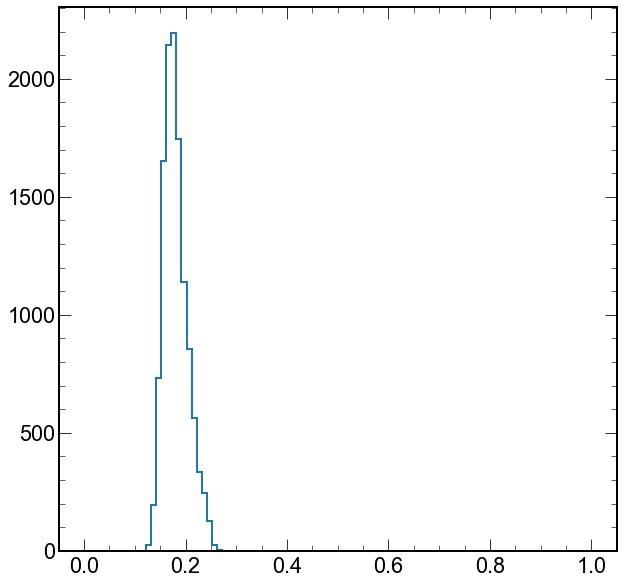

In [188]:
fig, ax = plt.subplots()

n,e = Hist(ws_unnormalized_lo_vr, bins=np.linspace(0,1,100), ax=ax)

In [180]:
X_cr_ls_lo = ak.nan_to_num(X.m[dat_CRls_mask][CRlslo],0).to_numpy()
np.isnan(X_cr_ls_lo).sum()
X_vr_ls_lo = ak.nan_to_num(X.m[dat_VRls_mask][VRlslo],0).to_numpy()

In [181]:
X_cr_ls_hi = ak.nan_to_num(X.m[dat_CRls_mask][CRlshi],0).to_numpy()
np.isnan(X_cr_ls_hi).sum()
X_vr_ls_hi = ak.nan_to_num(X.m[dat_VRls_mask][VRlshi],0).to_numpy()

In [221]:
X_cr_ls = ak.nan_to_num(X.m[dat_CRls_mask],0).to_numpy()
np.isnan(X_cr_ls).sum()
X_vr_ls = ak.nan_to_num(X.m[dat_VRls_mask],0).to_numpy()

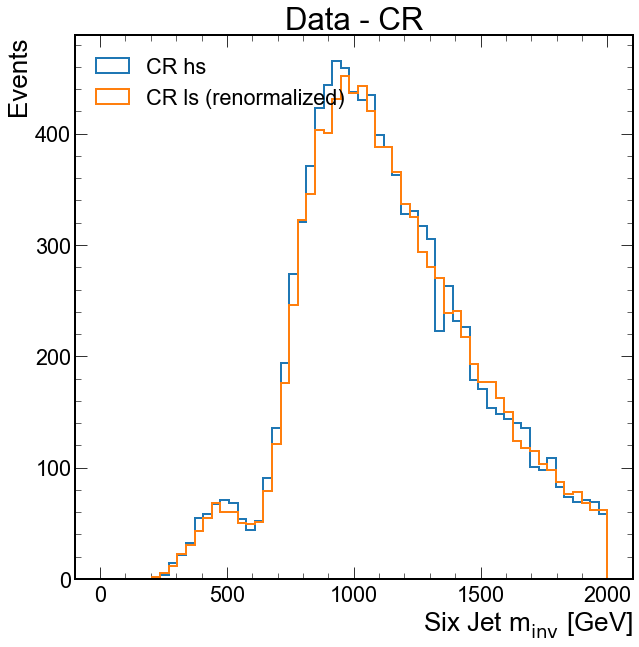

In [225]:
fig, ax = plt.subplots()#nrows=2, ncols=1, gridspec={})

ax.set_title('Data - CR')

assert(len(ws_unnormalized) == len(X_cr_ls))
n_CRhs, e = Hist(X.m[dat_CRhs_mask], bins=mBins, ax=ax, label='CR hs')
n_CRls, e = np.histogram(X.m[dat_CRls_mask].to_numpy(), bins=mBins)
n_CRls_transformed, e = Hist(X_cr_ls, weights=ws_unnormalized, bins=mBins, ax=ax, label='CR ls (renormalized)', scale=False)

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

# fig.savefig(f'plots/{sigTree.mXmY}_data_VRls_v_VRhs.pdf')

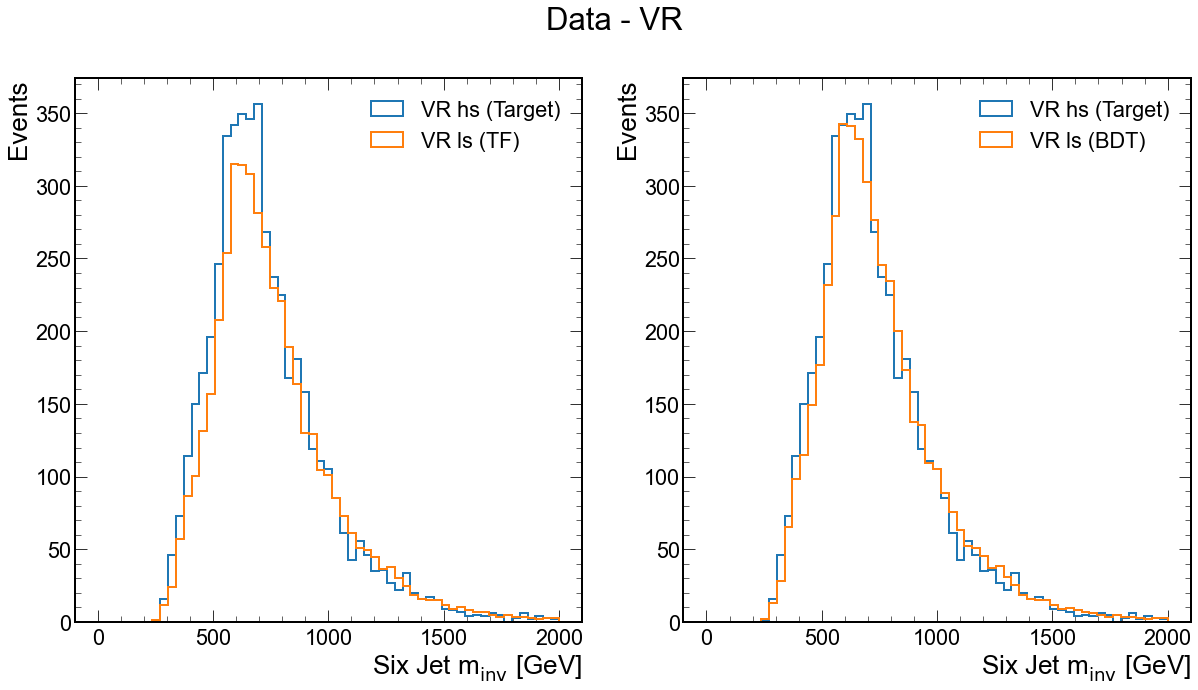

In [230]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
fig.suptitle('Data - VR')

ax = axs[0]
n_VRhs, e = Hist(X.m[dat_VRhs_mask].to_numpy(), bins=mBins, ax=ax, label='VR hs (Target)')
# assert(len(ws_unnormalized_vr) == len(X_vr_ls))
# n_VRls, e = np.histogram(X.m[dat_VRls_mask].to_numpy(), bins=mBins)
# n_VRls_transformed, e = Hist(X_vr_ls, weights=ws_unnormalized_vr, bins=mBins, ax=ax, label='VR ls (BDT)', scale=False)
n_VRls_TF, e = Hist(x_bins(mBins), weights=n_VRls*TF, bins=mBins, ax=ax, label='VR ls (TF)', scale=False)

ax = axs[1]
n_VRhs, e = Hist(X.m[dat_VRhs_mask].to_numpy(), bins=mBins, ax=ax, label='VR hs (Target)')
assert(len(ws_unnormalized_vr) == len(X_vr_ls))
n_VRls, e = np.histogram(X.m[dat_VRls_mask].to_numpy(), bins=mBins)
n_VRls_transformed, e = Hist(X_vr_ls, weights=ws_unnormalized_vr, bins=mBins, ax=ax, label='VR ls (BDT)', scale=False)
# n_VRls_TF, e = Hist(x_bins(mBins), weights=n_VRls*TF, bins=mBins, ax=ax, label='VR ls (TF)', scale=False)

for ax in axs:
    ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
    ax.set_ylabel('Events')
# ax.legend(loc=2)

fig.savefig(f'plots/{sigTree.mXmY}_data_VRls_v_VRhs_BDT.pdf', bbox_inches='tight')

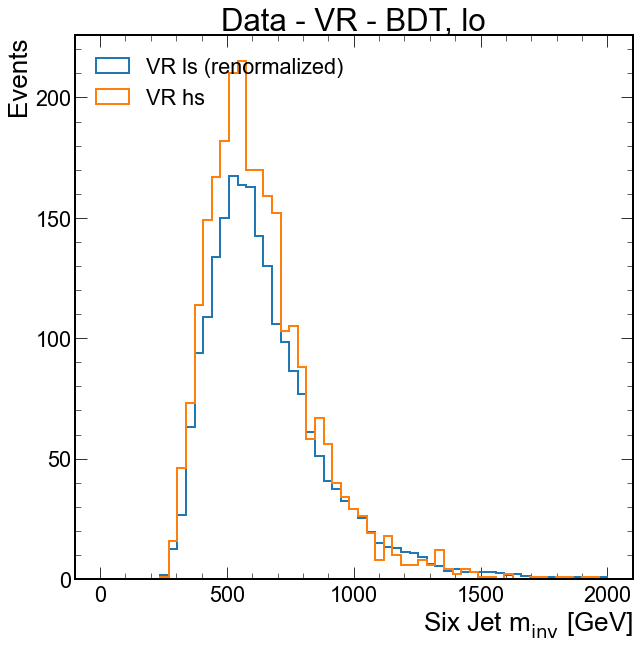

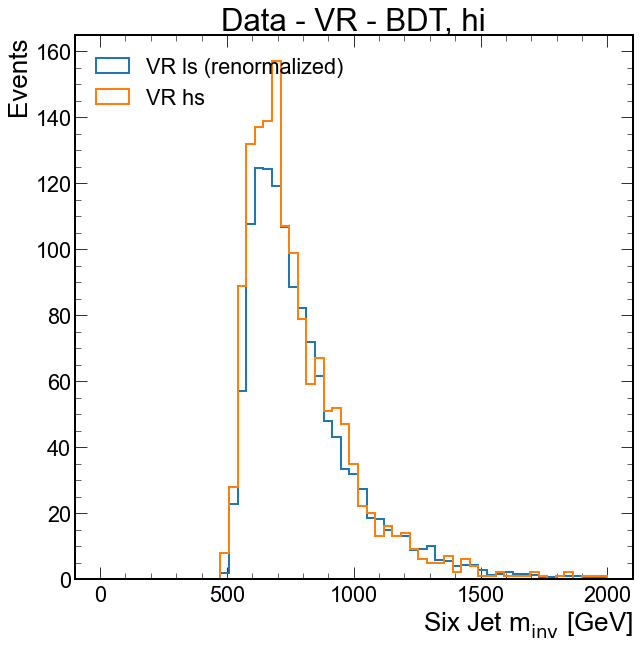

In [164]:
fig, ax = plt.subplots()#nrows=2, ncols=1, gridspec={})

ax.set_title('Data - VR - BDT, lo')

n_VRls_lo, e = np.histogram(X.m[dat_VRls_mask].to_numpy()[VRlslo], bins=mBins)
# print(n_CRls)
assert(len(ws_unnormalized_vr) == len(X_vr_ls))
n_VRls_transformed, e = Hist(X_vr_ls_lo, weights=ws_unnormalized_lo_vr, bins=mBins, ax=ax, label='VR ls (renormalized)', scale=False)
n_VRhs, e = Hist(X.m[dat_VRhs_mask].to_numpy()[VRhslo], bins=mBins, ax=ax, label='VR hs')
# n_CR, e = Hist(X.m[dat_CRls_mask], bins=mBins, ax=ax, label='CR ls')
# B = n[(e[:-1]>xmin) & (e[:-1]<xmax)].sum()
# print(n_CRhs.sum())

# ax.plot([xmin, xmin], [0, n.max()], color='k', alpha=0.6)
# ax.plot([xmax, xmax], [0, n.max()], color='k', alpha=0.6)

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

# fig.savefig(f'plots/{sigTree.mXmY}_data_VRls_v_VRhs_BDT.pdf')

fig, ax = plt.subplots()#nrows=2, ncols=1, gridspec={})

ax.set_title('Data - VR - BDT, hi')

n_VRls_hi, e = np.histogram(X.m[dat_VRls_mask].to_numpy()[VRlshi], bins=mBins)
# print(n_CRls)
assert(len(ws_unnormalized_vr) == len(X_vr_ls))
n_VRls_transformed, e = Hist(X_vr_ls_hi, weights=ws_unnormalized_hi_vr, bins=mBins, ax=ax, label='VR ls (renormalized)', scale=False)
n_VRhs, e = Hist(X.m[dat_VRhs_mask].to_numpy()[VRhshi], bins=mBins, ax=ax, label='VR hs')
# n_CR, e = Hist(X.m[dat_CRls_mask], bins=mBins, ax=ax, label='CR ls')
# B = n[(e[:-1]>xmin) & (e[:-1]<xmax)].sum()
# print(n_CRhs.sum())

# ax.plot([xmin, xmin], [0, n.max()], color='k', alpha=0.6)
# ax.plot([xmax, xmax], [0, n.max()], color='k', alpha=0.6)

ax.set_xlabel(r'Six Jet $m_\mathrm{inv}$ [GeV]')
ax.set_ylabel('Events')
ax.legend(loc=2)

# fig.savefig(f'plots/{sigTree.mXmY}_data_VRls_v_VRhs_BDT.pdf')

In [149]:
n_dat_SRls, _ = np.histogram(X.m[dat_SRls_mask].to_numpy(), bins=mBins)

n_dat_SRls_transformed = n_dat_SRls*TF

In [150]:
import ROOT
from array import array

KeyboardInterrupt: 

In [ ]:
assert len(n_dat_SRls_transformed) == len(n_sig_SRhs)

NameError: name 'n_sig_SRhs' is not defined

Data 3933.0447413023276
Signal 810.7361756812943


Info in <TCanvas::Print>: pdf file plots/All_SR.pdf has been created


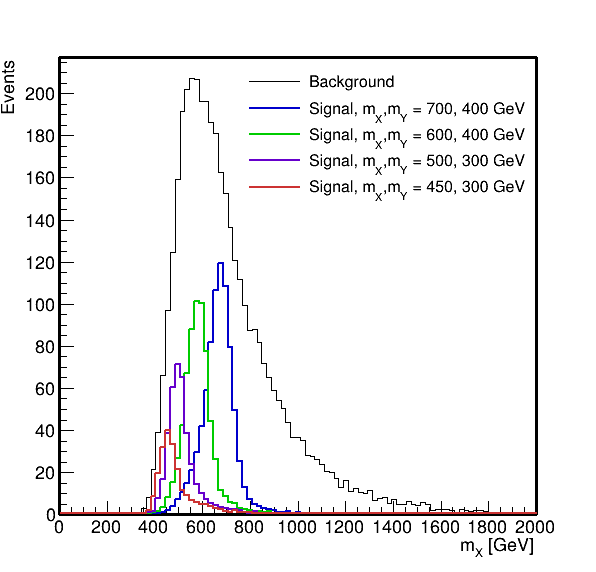

In [ ]:
try: del canvas, h_sig, h_sig1, h_sig2, h_sig4, h_dat
except: pass

canvas = ROOT.TCanvas('c1','c1', 600, 600)
canvas.SetFrameLineWidth(3)

h_dat = ROOT.TH1D("h_dat",";m_{X} [GeV];Events",len(n_dat_SRls_transformed),array('d',list(e)))
h_sig = ROOT.TH1D("h_sig",";m_{X} [GeV];Events",len(n_sig_SRhs),array('d',list(e)))
h_sig1 = ROOT.TH1D("h_sig1",";m_{X} [GeV];Events",len(n_sig1_SRhs),array('d',list(e)))
h_sig2 = ROOT.TH1D("h_sig2",";m_{X} [GeV];Events",len(n_sig2_SRhs),array('d',list(e)))
h_sig4 = ROOT.TH1D("h_sig4",";m_{X} [GeV];Events",len(n_sig4_SRhs),array('d',list(e)))

for i,(bin_sig,bin_dat,bin_sig1,bin_sig2,bin_sig4) in enumerate(zip(n_sig_SRhs, n_dat_SRls_transformed, n_sig1_SRhs,n_sig2_SRhs,n_sig4_SRhs)):
    h_dat.SetBinContent(i+1, bin_dat)
    h_sig.SetBinContent(i+1, bin_sig)
    h_sig1.SetBinContent(i+1, bin_sig1)
    h_sig2.SetBinContent(i+1, bin_sig2)
    h_sig4.SetBinContent(i+1, bin_sig4)

h_dat.Draw("hist")
h_sig.Draw("hist same")
h_sig4.Draw("hist same")
h_sig2.Draw("hist same")
h_sig1.Draw("hist same")
h_dat.SetLineColor(1)
h_sig.SetLineColor(ROOT.kBlue + 1)
h_sig4.SetLineColor(ROOT.kGreen + 1)
h_sig2.SetLineColor(ROOT.kViolet + 2)
h_sig1.SetLineColor(ROOT.kRed - 3)
# h_dat.SetLineWidth(2)
h_sig.SetLineWidth(2)
h_sig1.SetLineWidth(2)
h_sig2.SetLineWidth(2)
h_sig4.SetLineWidth(2)
h_sig.Scale(0.5)
h_sig1.Scale(0.5)
h_sig2.Scale(0.5)
h_sig4.Scale(0.5)
canvas.Draw()
print("Data",h_dat.Integral())
print("Signal",h_sig.Integral())

ROOT.gStyle.SetOptStat(0)
leg = ROOT.TLegend(0.4, 0.65, 0.88, 0.88)
leg.SetFillStyle(0)
leg.SetBorderSize(0)
leg.SetTextSize(0.03)
leg.AddEntry(h_dat, "Background", "l")
leg.AddEntry(h_sig, "Signal, m_{X},m_{Y} = 700, 400 GeV", "l")
leg.AddEntry(h_sig4, "Signal, m_{X},m_{Y} = 600, 400 GeV", "l")
leg.AddEntry(h_sig2, "Signal, m_{X},m_{Y} = 500, 300 GeV", "l")
leg.AddEntry(h_sig1, "Signal, m_{X},m_{Y} = 450, 300 GeV", "l")
leg.Draw()

# canvas.Print(f"plots/{sigTree.mXmY}_SR.pdf)","Title:Signal Region");
canvas.Print(f"plots/All_SR.pdf)","Title:Signal Region");

# fout = ROOT.TFile("mass_info/{sigTree.mXmY}_mX.root","recreate")
fout = ROOT.TFile("mass_info/all_sig_mX.root","recreate")
fout.cd()
h_dat.Write()
h_sig.Write()
fout.Close()

In [ ]:
sigTree.mXmY

'mX_700_mY_400'

In [ ]:
sigma = 2*np.sqrt(B)
mu = 2*np.sqrt(B)/S
sensitivity = sigTree.xsec*mu

In [ ]:
print(sigTree.mXmY)
print(f"    Number of signal events = {int(S)}")
print(f"Number of background events = {int(B)}")
print(f"    Standard Deviation of B = {int(sigma)}")
print(f"                         mu = {mu:.3f}")
print(f"                      limit = {sensitivity:.3f} pb")

mX_700_mY_400
    Number of signal events = 1045
Number of background events = 678
    Standard Deviation of B = 52
                         mu = 0.050
                      limit = 0.015 pb


In [ ]:
lines = [
    sigTree.mXmY + '\n',
    f"    Number of signal events = {int(S)}\n",
    f"Number of background events = {int(B)}\n",
    f"    Standard Deviation of B = {int(sigma)}\n",
    f"                         mu = {mu:.3f}\n",
    f"                      limit = {sensitivity:.3f} pb"]

In [ ]:
with open(f"mass_info/{sigTree.mXmY}.txt","w") as f:
    f.writelines(lines)

## Region Chart

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
CR_lo

5

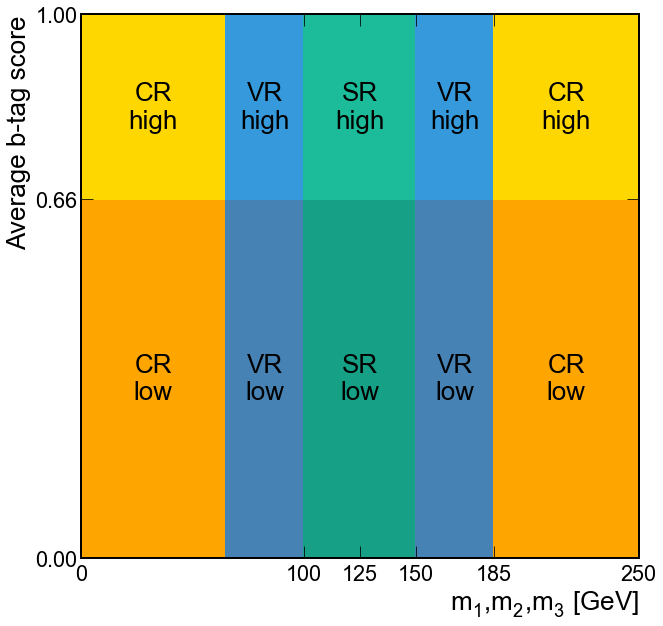

In [ ]:
fig, ax = plt.subplots()

ubound = 250
lbound = 0

hx = [30] + [75]*2 + [125]*3 + [175]*2 + [200]
hy = [0.5]*len(hx)
hx += [30]*4 + [75]*5 + [125]*6 + [175]*5 + [200]*4
hy += [0.75]*24

hx, hy = np.asarray(hx), np.asarray(hy)

xbins = np.array((lbound,VR_lo,SR_lo,SR_hi,VR_hi,ubound))
ybins = np.array((0,0.66,1.0))

# ax.hist2d(hx, hy, bins=(xbins,ybins))
cmp = ListedColormap(['orange', 'steelblue', (22/255, 160/255, 134/255, 1), 'gold', (53/255, 153/255, 219/255, 1), (28/255, 188/255, 155/255, 1)])
n,ex,ey,im = Hist2d(hx, hy, bins=(xbins,ybins), ax=ax, cmap=cmp)

ax.set_ylabel('Average b-tag score')
ax.set_xlabel(r'$m_1$,$m_2$,$m_3$ [GeV]')

txt_CR_lo = np.average((lbound,VR_lo))
txt_VR_lo = np.average((VR_lo,SR_lo))
txt_VR_hi = np.average((SR_hi,VR_hi))
txt_CR_hi = np.average((ubound,VR_hi))

ax.text(txt_CR_lo, 0.33, 'CR\nlow', ha='center', va='center')
ax.text(txt_CR_lo, 0.83, 'CR\nhigh', ha='center', va='center')
ax.text(txt_VR_lo, 0.33, 'VR\nlow', ha='center', va='center')
ax.text(txt_VR_lo, 0.83, 'VR\nhigh', ha='center', va='center')
ax.text(125, 0.33, 'SR\nlow', ha='center', va='center')
ax.text(125, 0.83, 'SR\nhigh', ha='center', va='center')
ax.text(txt_VR_hi, 0.33, 'VR\nlow', ha='center', va='center')
ax.text(txt_VR_hi, 0.83, 'VR\nhigh', ha='center', va='center')
ax.text(txt_CR_hi, 0.33, 'CR\nlow', ha='center', va='center')
ax.text(txt_CR_hi, 0.83, 'CR\nhigh', ha='center', va='center')

ax.minorticks_off()
ax.set_xticks(ticks=[lbound,100,125,150,185,ubound])
ax.set_yticks(ticks=[0, 0.66, 1.0])

fig.savefig("region_diagram.pdf",bbox_inches='tight')